# Leios simulation analysis for protocol-parameters

## Set up

### Load packages

In [1]:
suppressMessages({
    require(cowplot, quietly=TRUE)
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Experiment: Varying protocol parameters

### Analysis of lifecycles and efficiencies

#### Read the lifecycle results

In [2]:
if (file.exists("results/lifecycle.Rdata")) {
    load(file="results/lifecycle.Rdata")
    cat(paste("Loaded Rdata file: sampleSize =", sampleSize, "\n"))
} else {
    lifecycle <- fread("results/lifecycle.csv.gz", stringsAsFactors=TRUE)
    sampleSize <- 1
    save(lifecycle, sampleSize, file="results/lifecycle.R")
    cat(paste("Saved Rdata file: sampleSize =", sampleSize, "\n"))
}
setnames(lifecycle, old="Kind", new="Message")
lifecycle <- lifecycle[`Throughput` == "0.200 TxMB/s"]
lifecycle %>% summary

Loaded Rdata file: sampleSize = 1 


        Network          Bandwidth                CPU         
 topology-v2:6177796   10 Mb/s:6177796   4 vCPU/node:6177796  
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
          Delta header            Diffusion duration 
 Δ_hdr = 1000 ms:2059120   L_diff = 1 slots:1544408  
 Δ_hdr = 1500 ms:2059116   L_diff = 3 slots:1544425  
 Δ_hdr = 2000 ms:2059560   L_diff = 5 slots:1544457  
                           L_diff = 7 slots:1544506  
                                                     
                                                     
                                                     
         Voting duration      Max EB size           Tx size     

In [3]:
label <- lifecycle[, unique(paste(`Network`, `Bandwidth`, `CPU`, `Max EB size`, `Tx size`, `Throughput`, sep=", "))]
label

[1] "topology-v2, 10 Mb/s, 4 vCPU/node, 12 MB/EB, 1500 B/Tx, 0.200 TxMB/s"

In [4]:
fixed <- c("Network", "Bandwidth", "CPU", "Max EB size", "Tx size", "Throughput")

In [5]:
variedX <- c("Diffusion duration")

In [6]:
variedY <- c("Voting duration")

In [7]:
variedZ <- c("Delta header")

In [8]:
varied <- c(variedY, variedX, variedZ)

In [9]:
lifecycle[, `:=`(
    `VariedX`=`Diffusion duration`,
    `VariedY`=`Voting duration`,
    `VariedZ`=`Delta header`
)]

In [10]:
zs <- lifecycle[, unique(`VariedZ`)]

#### Range of transaction injection

In [11]:
txFirst <- lifecycle[, median(`Tx start [s]`)]
txLast <- lifecycle[, median(`Tx stop [s]`)]
txWindow <- txLast - txFirst
simFinish <- lifecycle[, median(`Sim stop [s]`)]

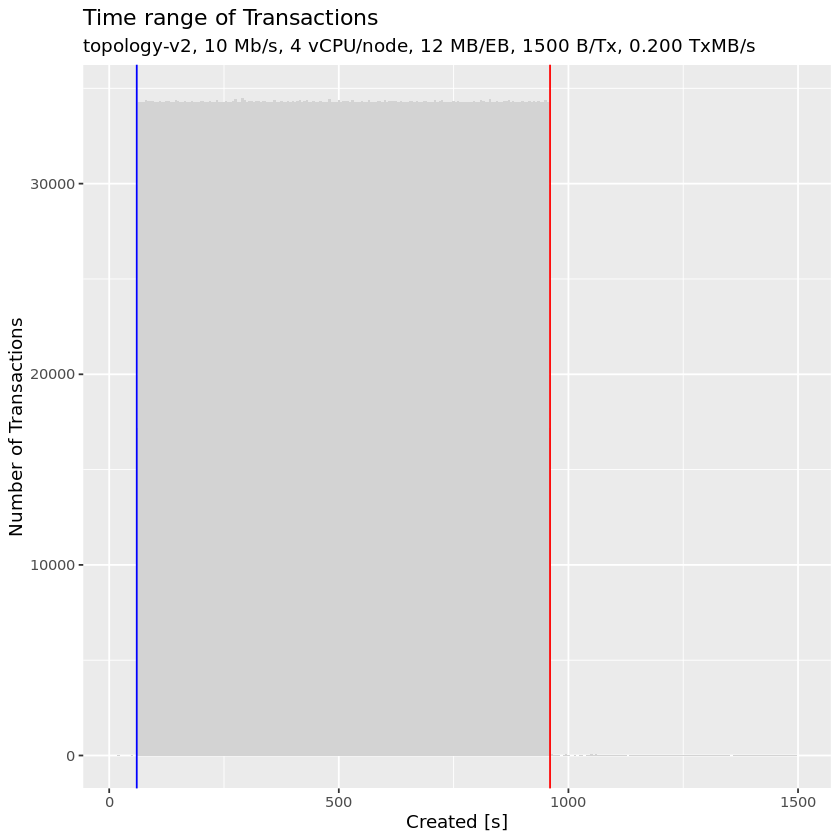

In [12]:
ggplot(lifecycle, aes(x=`Created [s]`)) +
    geom_histogram(binwidth=5, fill="lightgray") +
    geom_vline(xintercept=txFirst, color="blue") +
    geom_vline(xintercept=txLast, color="red") +
    ylab("Number of Transactions") +
    ggtitle("Time range of Transactions", label)

#### Actual TPS

In [13]:
dtmp <- lifecycle[
    `Message` == "TX" & `Created [s]` >= txFirst & `Created [s]` <= txLast, 
    .(
        `Demand [tx/s]`=.N/txWindow
    ),
    c(fixed, varied)
]
setorderv(dtmp, varied)
dtmp

Network,Bandwidth,CPU,Max EB size,Tx size,Throughput,Voting duration,Diffusion duration,Delta header,Demand [tx/s]
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1000 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1500 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 2000 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1000 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1500 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 2000 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1000 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1500 ms,142.8578
topology-v2,10 Mb/s,4 vCPU/node,12 MB/EB,1500 B/Tx,0.200 TxMB/s,L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 2000 ms,142.8578


#### Size of persisted data

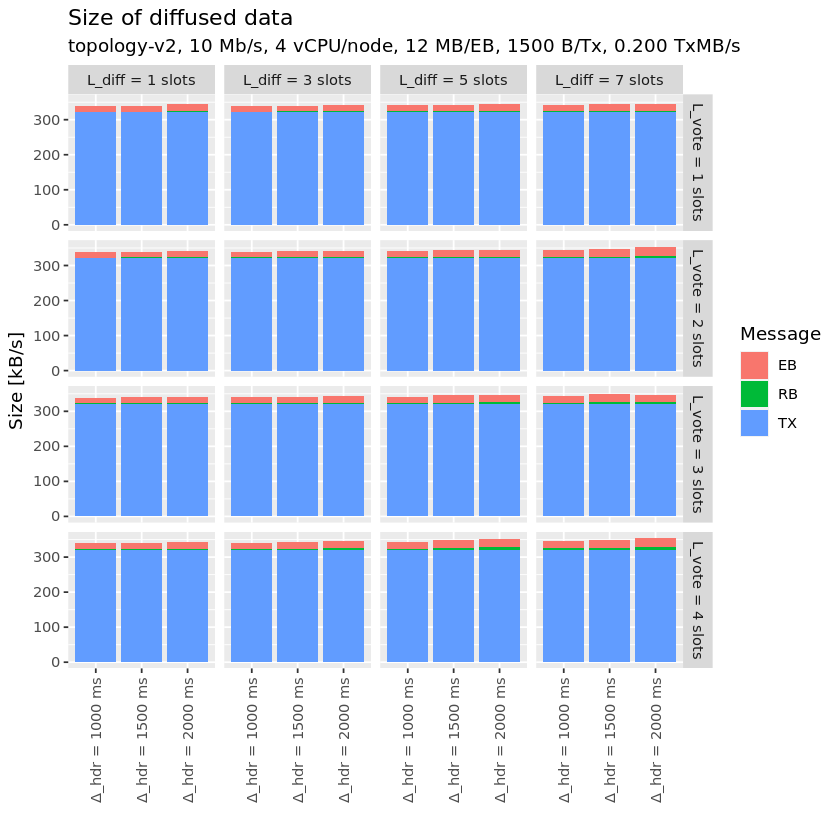

In [14]:
ggplot(
    lifecycle[,
        .(`Size [kB/s]`=sum(`Size [B]`)/1e3/600),
        c("VariedX", "VariedY", "VariedZ", "Message")
    ],
    aes(x=`VariedZ`, y=`Size [kB/s]`, fill=`Message`)
) + geom_bar(stat="identity") +
    facet_grid(`VariedY` ~ `VariedX`) +
    xlab("") +
    ggtitle("Size of diffused data", subtitle=label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [15]:
ggsave("plots/sizes.png", units="in", dpi=150, width=11, height=17)

#### Spatial efficiency

In [16]:
dtmp <- lifecycle[
        `Message` == "TX", 
        .(`Tx size [B]`=sum(ifelse(is.na(`To RB [s]`) & is.na(`In RB [s]`), 0, 1.0 * `Size [B]`))),
        varied
    ][
        lifecycle[
            , 
            .(`Non-tx size [B]`=sum(as.numeric((`Message` == "TX" | `Message` == "EB" | `Message` == "RB") * `Size [B]`))), 
            varied
        ],
        on=varied
    ][, .(`Space efficiency [%]`=100*`Tx size [B]`/`Non-tx size [B]`), varied]
setorderv(dtmp, varied)
dtmp

Voting duration,Diffusion duration,Delta header,Space efficiency [%]
<fct>,<fct>,<fct>,<dbl>
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1000 ms,95.13392
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1500 ms,94.91977
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 2000 ms,93.49185
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1000 ms,94.83448
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1500 ms,94.43541
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 2000 ms,93.91163
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1000 ms,94.37375
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1500 ms,94.09977
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 2000 ms,93.39394


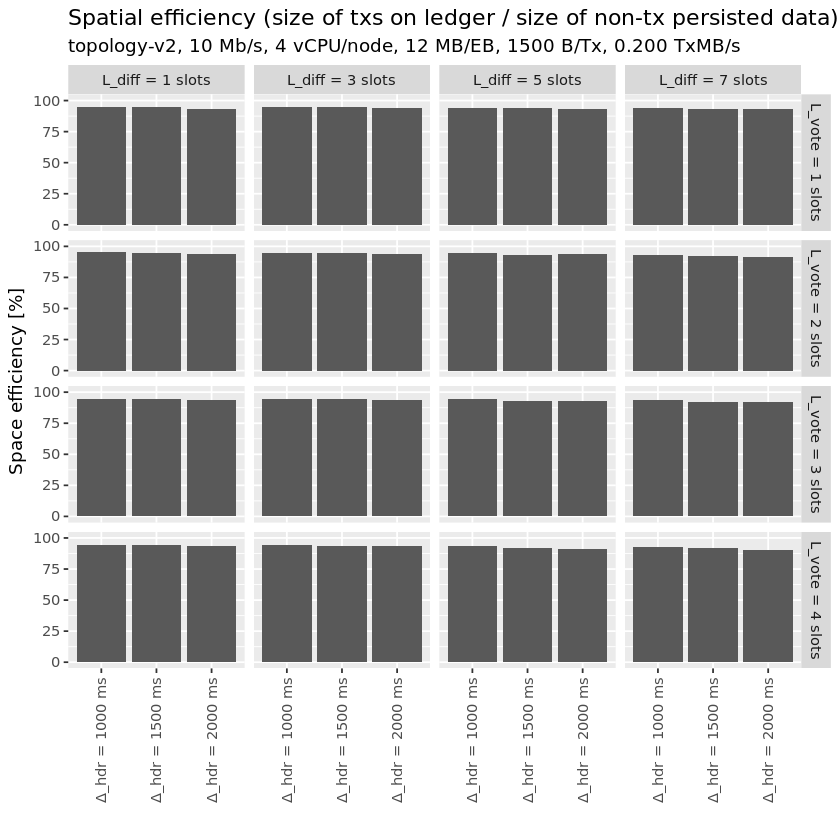

In [17]:
ggplot(
    lifecycle[
        `Message` == "TX", 
        .(`Tx size [B]`=sum(ifelse(is.na(`To RB [s]`) & is.na(`In RB [s]`), 0, 1.0 * `Size [B]`))),
        .(`VariedX`, `VariedY`, `VariedZ`)
    ][
        lifecycle[
            `Message` != "VT", 
            .(`Non-tx size [B]`=sum(as.numeric((`Message` == "TX" | `Message` == "EB" | `Message` == "RB") * `Size [B]`))), 
            .(`VariedX`, `VariedY`, `VariedZ`)
        ],
        on=c("VariedX", "VariedY", "VariedZ")
    ][, .(`Space efficiency [%]`=100*`Tx size [B]`/`Non-tx size [B]`), .(`VariedX`, `VariedY`, `VariedZ`)],
    aes(x=`VariedZ`, y=`Space efficiency [%]`)
) +
    geom_bar(stat="identity") +
    facet_grid(`VariedY` ~ `VariedX`) +
    ylim(0, 100) +
    xlab("") +
    ggtitle("Spatial efficiency (size of txs on ledger / size of non-tx persisted data)", label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [18]:
ggsave("plots/spatial-efficiency.png", units="in", dpi=150, width=11, height=17)

#### Time to reach the EB

In [19]:
dtmp <- lifecycle[
        `Message` == "TX" & 
        !is.na(`To EB [s]`) &
        `Created [s]` >= txFirst & `Created [s]` <= txLast, 
        .(`Time to reach EB [s]`=mean(`To EB [s]`-`Created [s]`)), 
        varied
    ]
setorderv(dtmp, varied)
dtmp

Voting duration,Diffusion duration,Delta header,Time to reach EB [s]
<fct>,<fct>,<fct>,<dbl>
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1000 ms,30.70423
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1500 ms,36.53613
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 2000 ms,13.68000
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1000 ms,31.79854
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1500 ms,36.53291
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 2000 ms,30.80504
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1000 ms,34.95612
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1500 ms,38.44485
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 2000 ms,26.41349


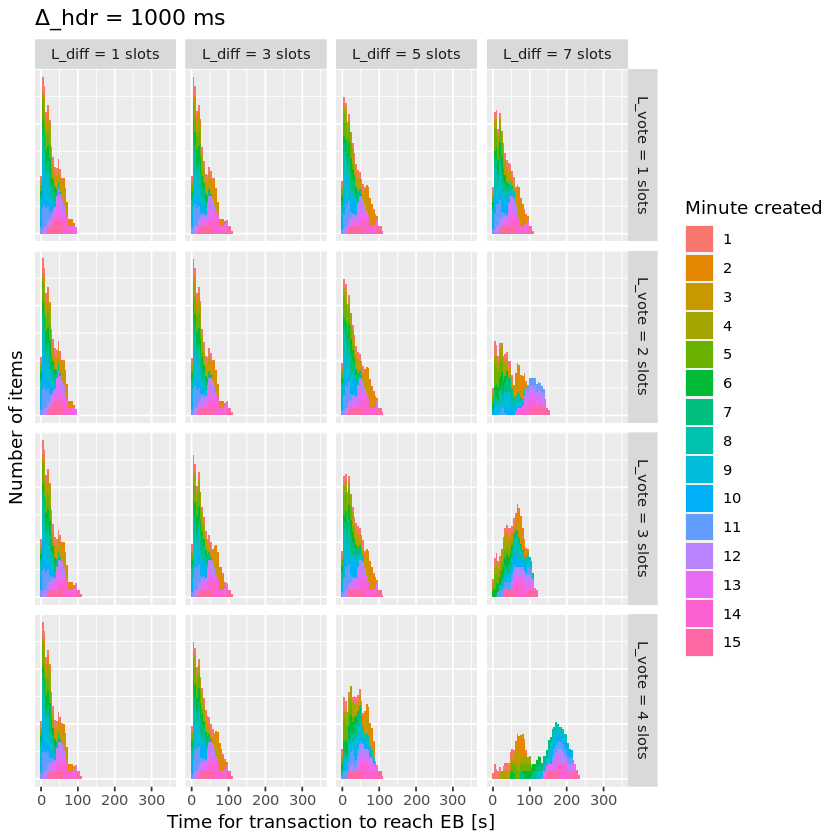

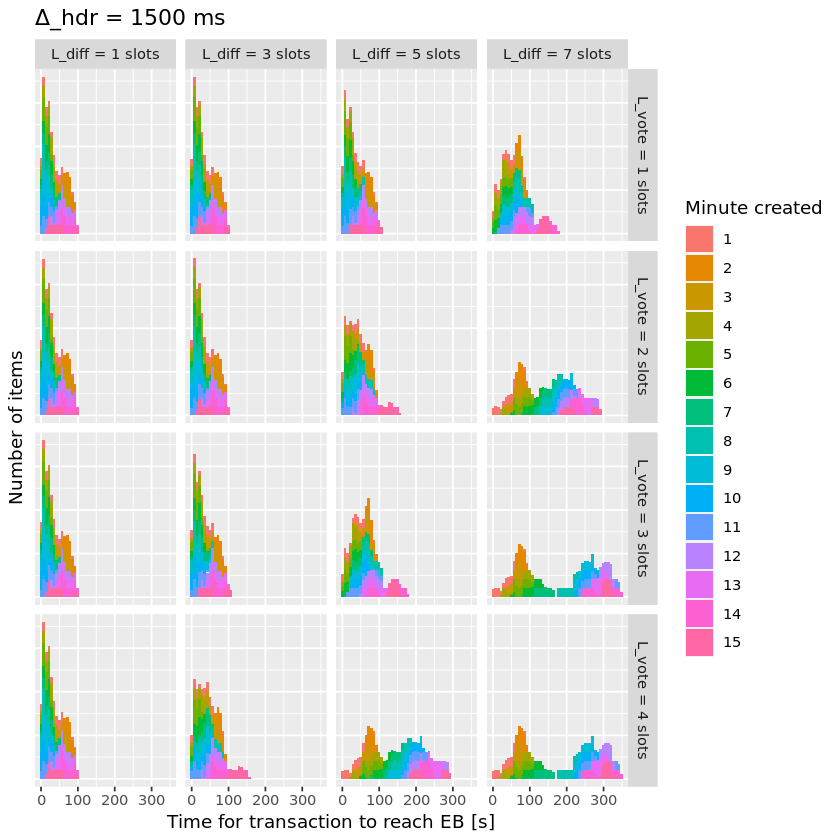

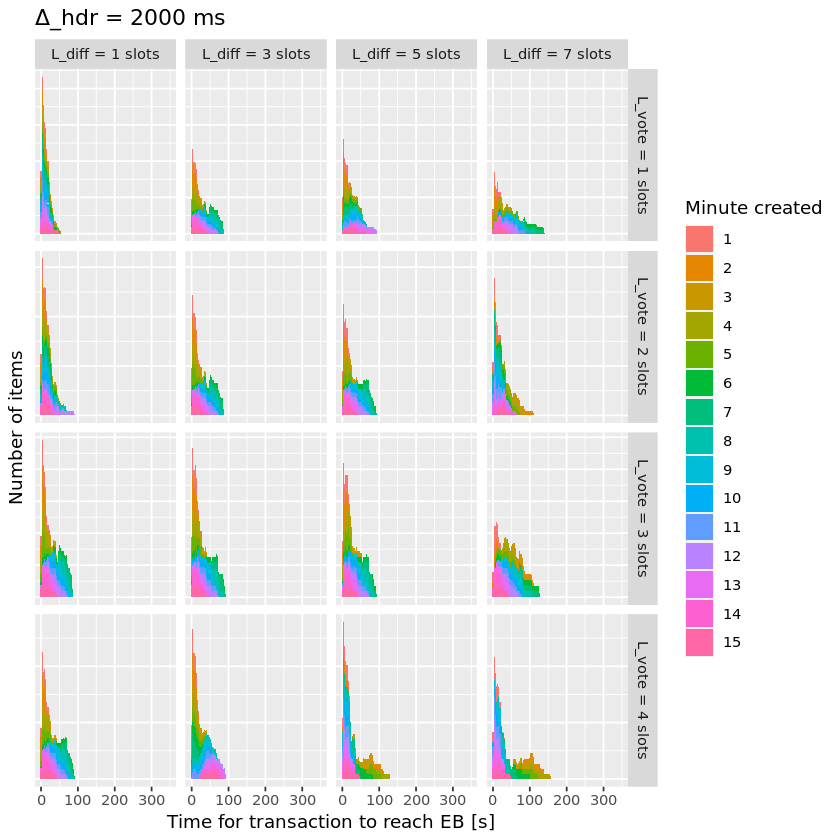

In [20]:
dtmp <-
    lifecycle[
        `Message` == "TX" & 
        !is.na(`To EB [s]`) &
        `Created [s]` >= txFirst & `Created [s]` < txLast, 
        .(`Time to reach EB [s]`=(`To EB [s]`-`Created [s]`)), 
        .(`VariedX`, `VariedY`,`VariedZ`, `Minute created`=factor(floor(`Created [s]`/60)))
    ]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`Time to reach EB [s]`, fill=`Minute created`)) +
        geom_histogram(bins=50, position="stack") +
        facet_grid(`VariedY` ~ `VariedX`, scales="free_y") +
        coord_cartesian(xlim=c(0, dtmp[, max(`Time to reach EB [s]`)])) +
        xlab("Time for transaction to reach EB [s]") +
        ylab("Number of items") +
        ggtitle(z) +
        theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())
})
lapply(ps, print) %>% invisible

In [21]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Time for transaction to reach an EB", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/reach-eb-tx.png", units="in", dpi=150, width=11, height=17)

#### Time to reach the ledger

In [22]:
dtmp <- lifecycle[
        `Message` == "TX" & 
        !is.na(`To RB [s]`) &
        `Created [s]` >= txFirst & `Created [s]` <= txLast, 
        .(`Time to reach ledger [s]`=mean(`To RB [s]`-`Created [s]`)), 
        varied
    ]
setorderv(dtmp, varied)
dtmp

Voting duration,Diffusion duration,Delta header,Time to reach ledger [s]
<fct>,<fct>,<fct>,<dbl>
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1000 ms,56.15541
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 1500 ms,63.29020
L_vote = 1 slots,L_diff = 1 slots,Δ_hdr = 2000 ms,35.72770
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1000 ms,58.50785
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 1500 ms,64.27896
L_vote = 1 slots,L_diff = 3 slots,Δ_hdr = 2000 ms,57.52314
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1000 ms,63.74295
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 1500 ms,68.39668
L_vote = 1 slots,L_diff = 5 slots,Δ_hdr = 2000 ms,58.37242


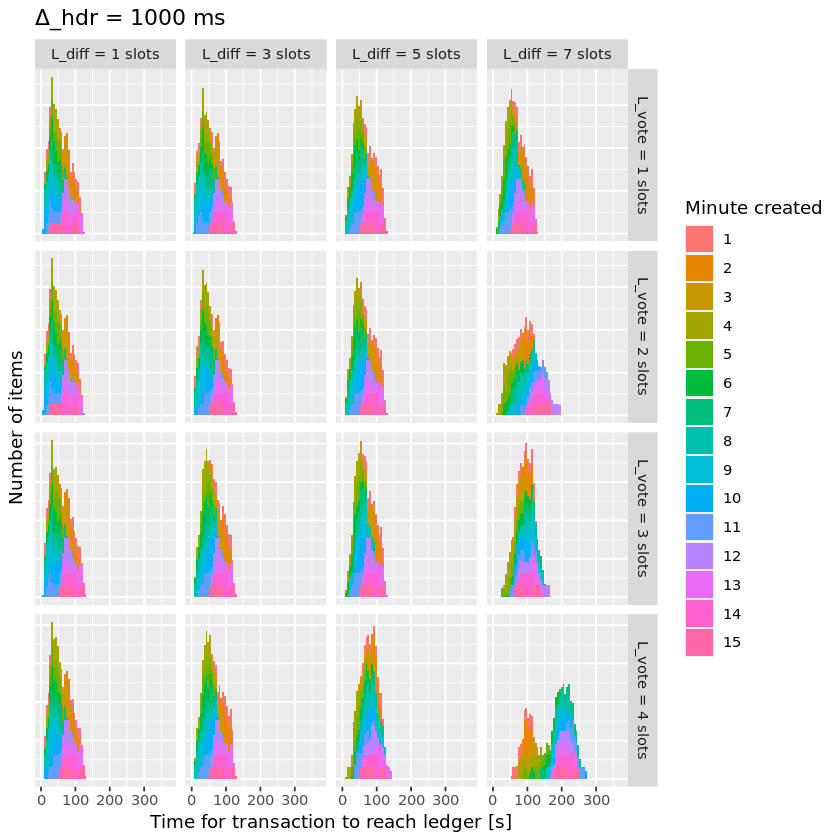

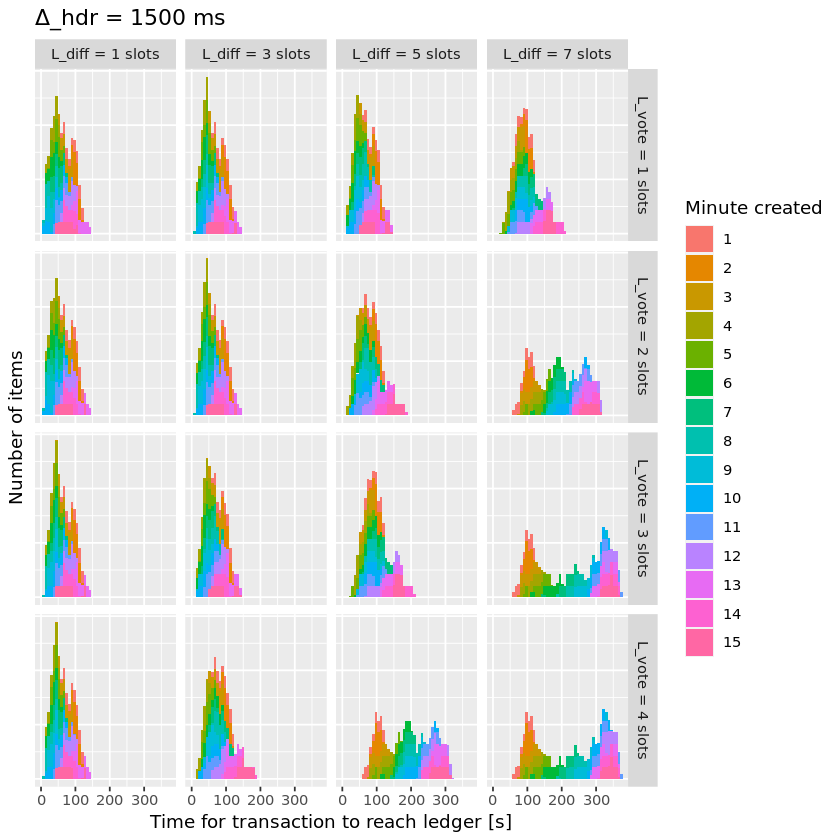

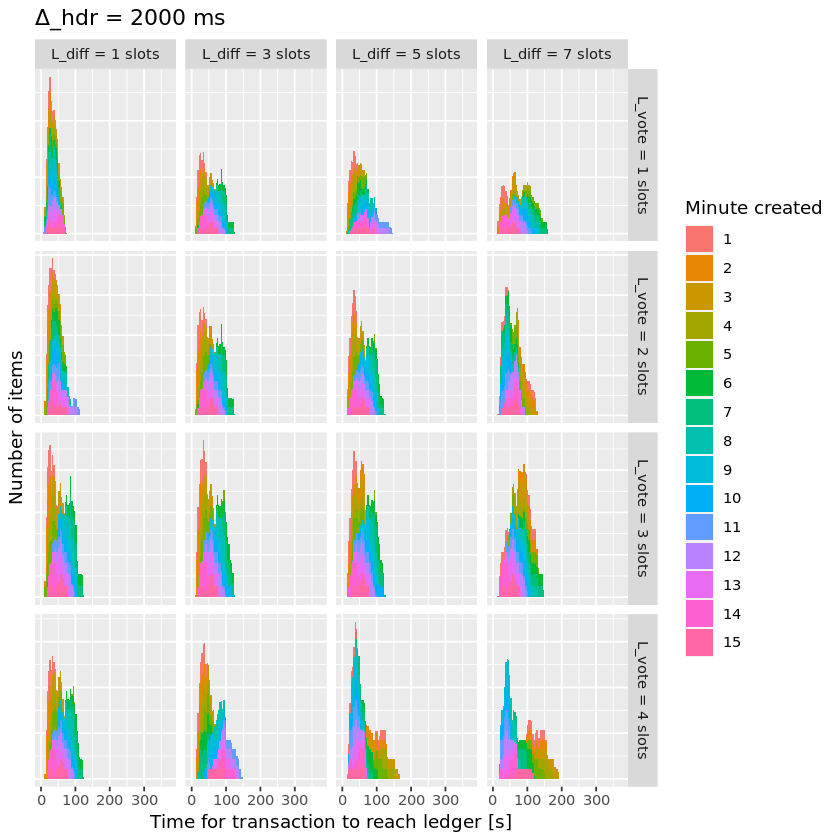

In [23]:
dtmp <-
    lifecycle[
        `Message` == "TX" & 
        !is.na(`To RB [s]`) &
        `Created [s]` >= txFirst & `Created [s]` < txLast, 
        .(`Time to reach ledger [s]`=`To RB [s]`-`Created [s]`), 
        .(`VariedX`, `VariedY`, `VariedZ`, `Minute created`=factor(floor(`Created [s]`/60)))
    ]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`Time to reach ledger [s]`, fill=`Minute created`)) + 
        geom_histogram(bins=50) +
        facet_grid(`VariedY` ~ `VariedX`, scales="free_y") +
        coord_cartesian(xlim=c(0, dtmp[, max(`Time to reach ledger [s]`)])) +
        xlab("Time for transaction to reach ledger [s]") +
        ylab("Number of items") +
        ggtitle(z) +
        theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())
})
lapply(ps, print) %>% invisible

In [24]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Time for transaction to reach the ledger", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/reach-rb-tx.png", units="in", dpi=150, width=11, height=17)

#### Number of references

A *reference* is one of the following:

- A transaction is included in an IB.
- An IB is referenced by an EB.
- An EB is referenced by another EB.

In an efficient Leios, the number of references for each data item would be one.

- *Zero references* indicates that the item was not used.
- *Two or more references* indicates that duplication has occurred.

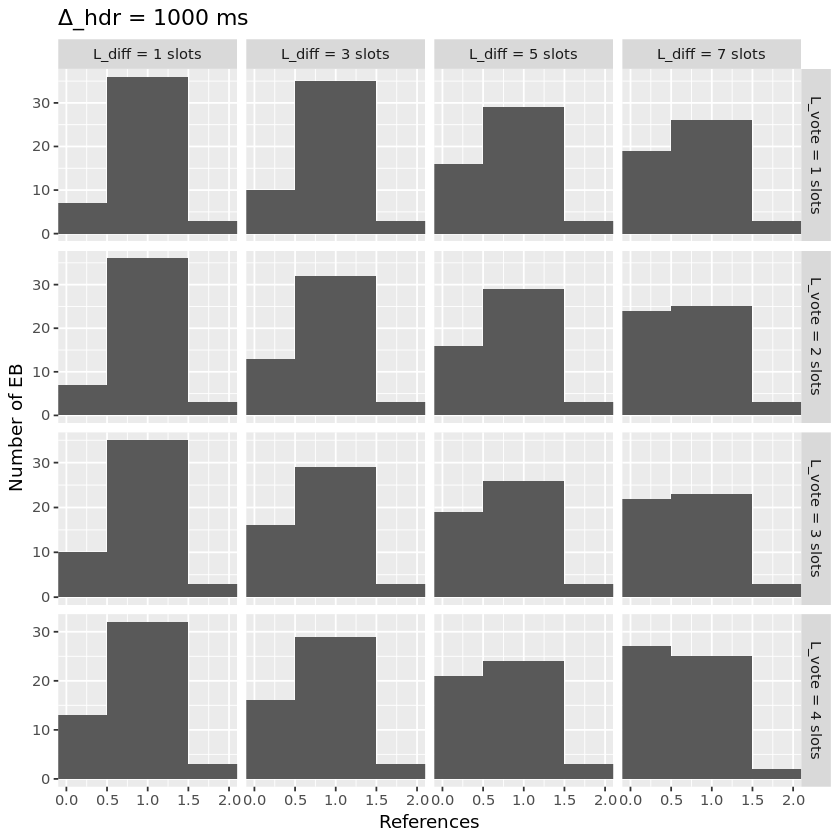

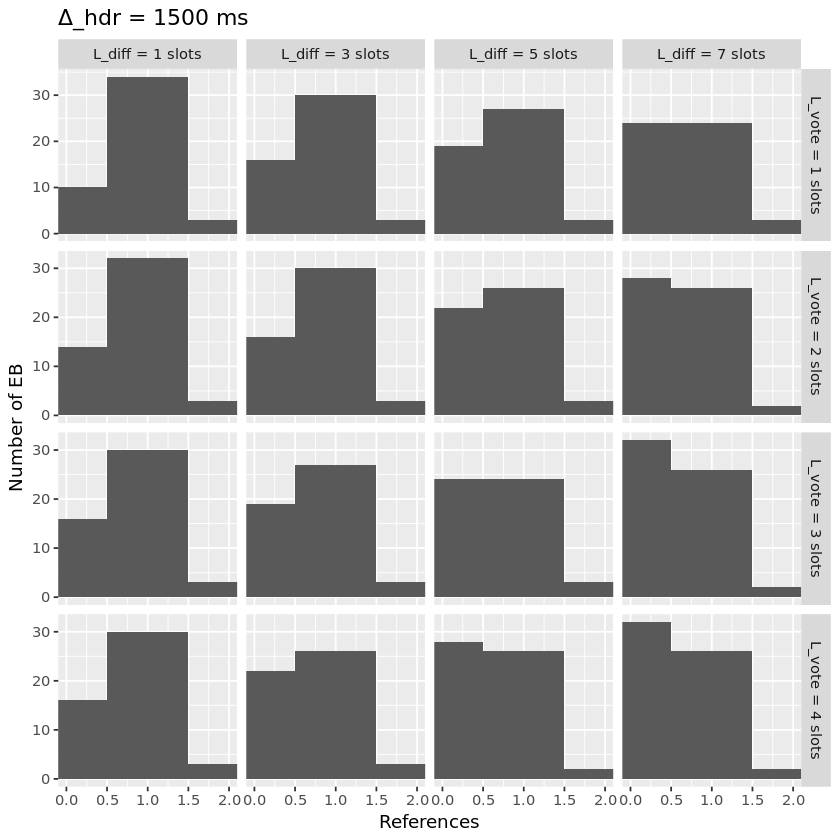

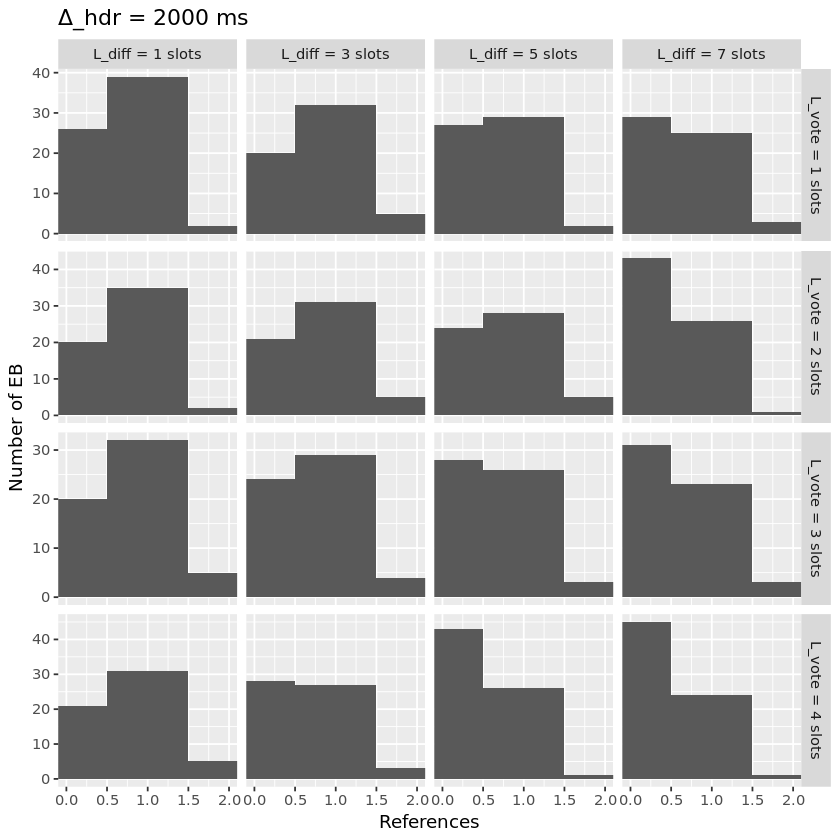

In [25]:
dtmp <-
    lifecycle[
        `Message` == "EB",
        .(`References`),
        .(`VariedX`, `VariedY`, `VariedZ`)
    ]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`References`)) +
        geom_histogram(binwidth=1) +
        facet_grid(`VariedY` ~ `VariedX`, scales="free_y") +
        coord_cartesian(xlim=c(0, dtmp[, max(`References`)])) +
        ylab("Number of EB") +
        ggtitle(z)
})
lapply(ps, print) %>% invisible

In [26]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Number of EB references (0 = not used, 2+ = duplicated)", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/references-tx.png", units="in", dpi=150, width=11, height=17)

In [27]:
ggsave("plots/references-tx.png", units="in", dpi=150, width=11, height=17)

#### Temporal efficiency

In [28]:
toElapsed <- function(created, toRb, inRb) {
    if (!is.na(toRb))
        toRb - created
    else if (!is.na(inRb))
        inRb - created
    else
        as.numeric(NA)
}

In [29]:
outcomes <- lifecycle[
    `Message` == "TX" & `Created [s]` < txLast,
    .(
        `Submitted [minute]`=factor(floor(`Created [s]`/60)), 
        `Time to reach ledger [s]`=mapply(toElapsed, `Created [s]`, `To RB [s]`, `In RB [s]`)
    ),
    .(`VariedX`, `VariedY`, `VariedZ`)
]

In [30]:
totals <- 
    outcomes[
        , 
        .(
            `Total`=.N, 
            `Lost`=sum(is.na(`Time to reach ledger [s]`)),
            `1st min`=sum(`Time to reach ledger [s]`<=60,na.rm=TRUE),
            `2nd min`=sum(`Time to reach ledger [s]`>60&`Time to reach ledger [s]`<=120,na.rm=TRUE),
            `3rd min`=sum(`Time to reach ledger [s]`>120&`Time to reach ledger [s]`<=180,na.rm=TRUE)
        ), 
        .(`VariedX`, `VariedY`, `VariedZ`, `Submitted [minute]`)
    ]

#### Transactions reaching the ledger

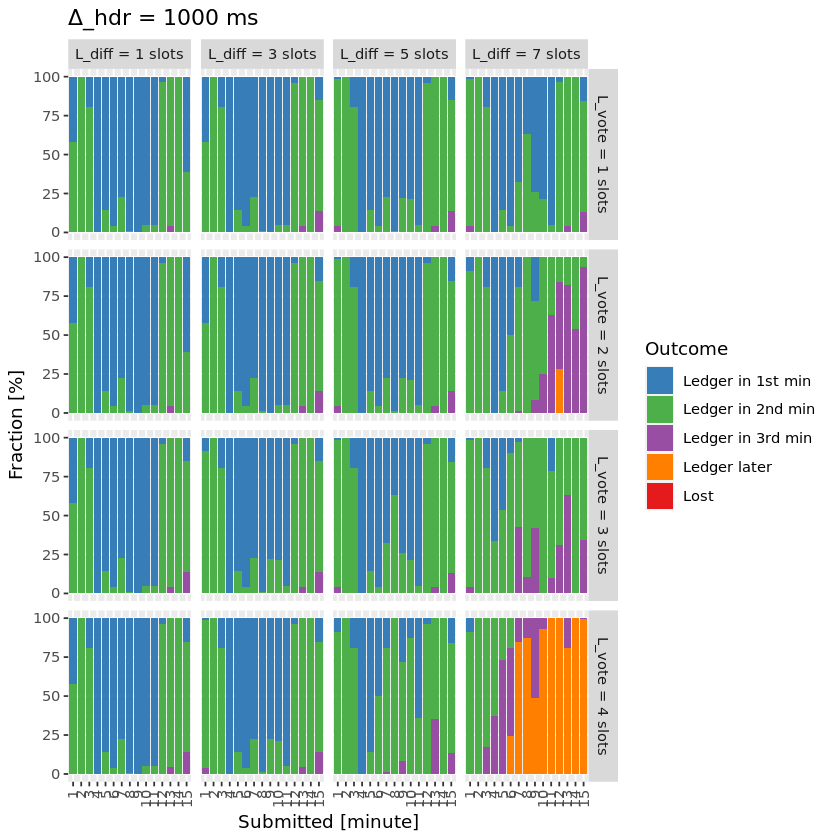

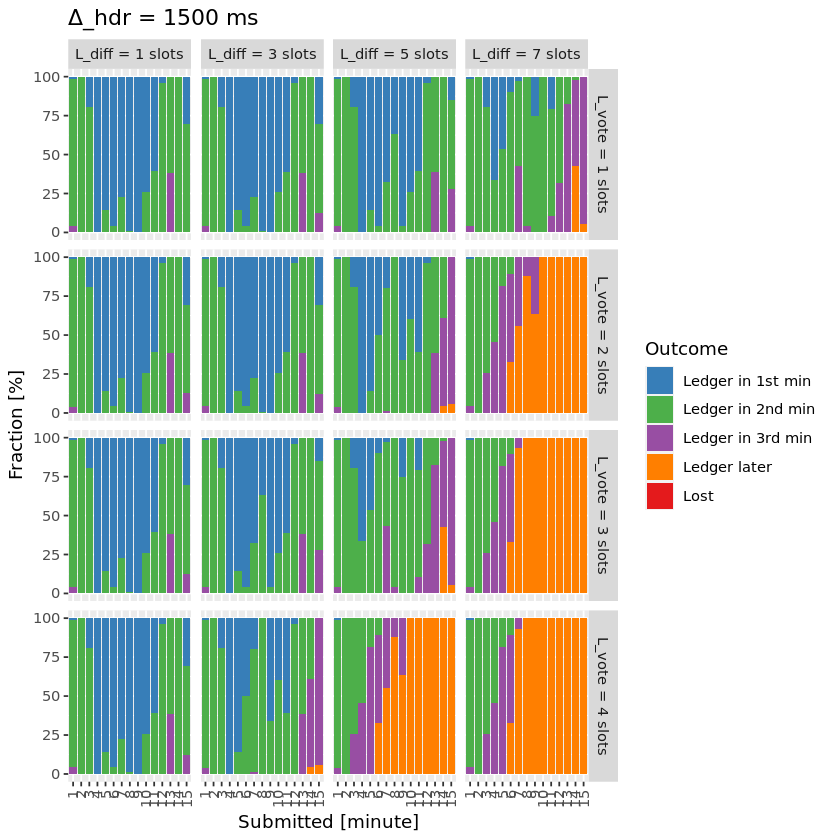

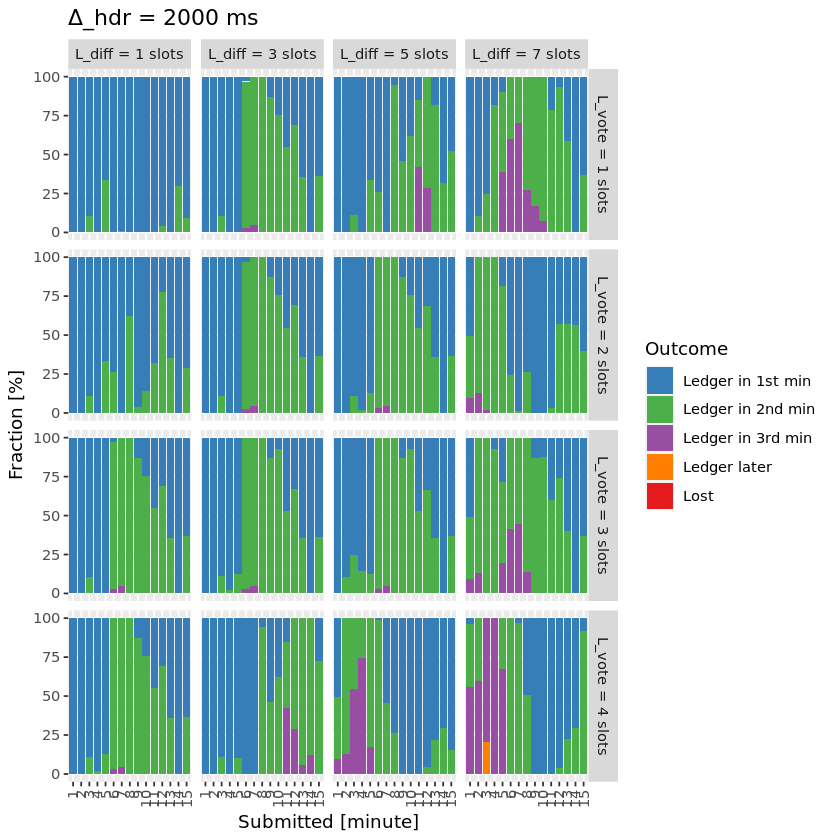

In [31]:
dtmp <-
    melt(
            totals[
                , 
                .(
                    `Ledger in 1st min`=`1st min`/`Total`, 
                    `Ledger in 2nd min`=`2nd min`/`Total`, 
                    `Ledger in 3rd min`=`3rd min`/`Total`, 
                    `Ledger later`=(`Total`-`Lost`-`1st min`-`2nd min`-`3rd min`)/`Total`,
                    `Lost`=`Lost`/`Total`
                ), 
                .(`VariedX`, `VariedY`, `VariedZ`, `Submitted [minute]`)
            ],
            id.vars=c("VariedX", "VariedY", "VariedZ", "Submitted [minute]"),
            variable.name="Outcome",
            value.name="Fraction"
        )[, .(
            `VariedX`, `VariedY`, `VariedZ`,
            `Submitted [minute]`, 
            `Outcome`=factor(`Outcome`,levels=c("Ledger in 1st min", "Ledger in 2nd min", "Ledger in 3rd min", "Ledger later","Lost")), 
            `Fraction [%]`=100*`Fraction`
        )]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`Submitted [minute]`, y=`Fraction [%]`, fill=`Outcome`)) +
        geom_bar(stat="identity") +
        facet_grid(`VariedY` ~ `VariedX`) +
        scale_fill_manual(values=c(
            "Ledger in 1st min"=brewer.pal(n=5, name="Set1")[[2]], 
            "Ledger in 2nd min"=brewer.pal(n=5, name="Set1")[[3]], 
            "Ledger in 3rd min"=brewer.pal(n=5, name="Set1")[[4]], 
            "Ledger later"=brewer.pal(n=5, name="Set1")[[5]],
            "Lost"=brewer.pal(n=5, name="Set1")[[1]]
        )) +
        ggtitle(z) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
})
lapply(ps, print) %>% invisible

In [32]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Transactions reaching the ledger", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/temporal-efficiency-bar.png", units="in", dpi=150, width=11, height=17)

#### Release memory

In [33]:
rm(lifecycle, outcomes, totals, dtmp, ps, g)

In [34]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1039798,55.6,2289898,122.3,2289898,122.3
Vcells,2053952,15.7,186934657,1426.2,233668321,1782.8


### Resource usage

In [35]:
if (file.exists("results/resources.Rdata")) {
    load(file="results/resources.Rdata")
    cat(paste("Loaded Rdata file: sampleSize =", sampleSize, "\n"))
} else {
    resources <- fread("results/resources.csv.gz", stringsAsFactors=TRUE)
    sampleSize <- 1
    save(resources, file="results/resources.Rdata")
    cat(paste("Saved Rdata file: sampleSize =", sampleSize, "\n"))
}
resources <- resources[`Throughput` == "0.200 TxMB/s"]
resources %>% summary
resources[, `:=`(
    `VariedX`=`Diffusion duration`,
    `VariedY`=`Voting duration`,
    `VariedZ`=`Delta header`
)]

Loaded Rdata file: sampleSize = 1 


        Network        Bandwidth              CPU       
 topology-v2:36000   10 Mb/s:36000   4 vCPU/node:36000  
                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
          Delta header          Diffusion duration         Voting duration
 Δ_hdr = 1000 ms:12000   L_diff = 1 slots:9000     L_vote = 1 slots:9000  
 Δ_hdr = 1500 ms:12000   L_diff = 3 slots:9000     L_vote = 2 slots:9000  
 Δ_hdr = 2000 ms:12000   L_diff = 5 slots:9000     L_vote = 3 slots:9000  
                         L_diff = 7 slots:9000     L_vote = 4 slots:9000  
                                                                          
                                                                          
                   

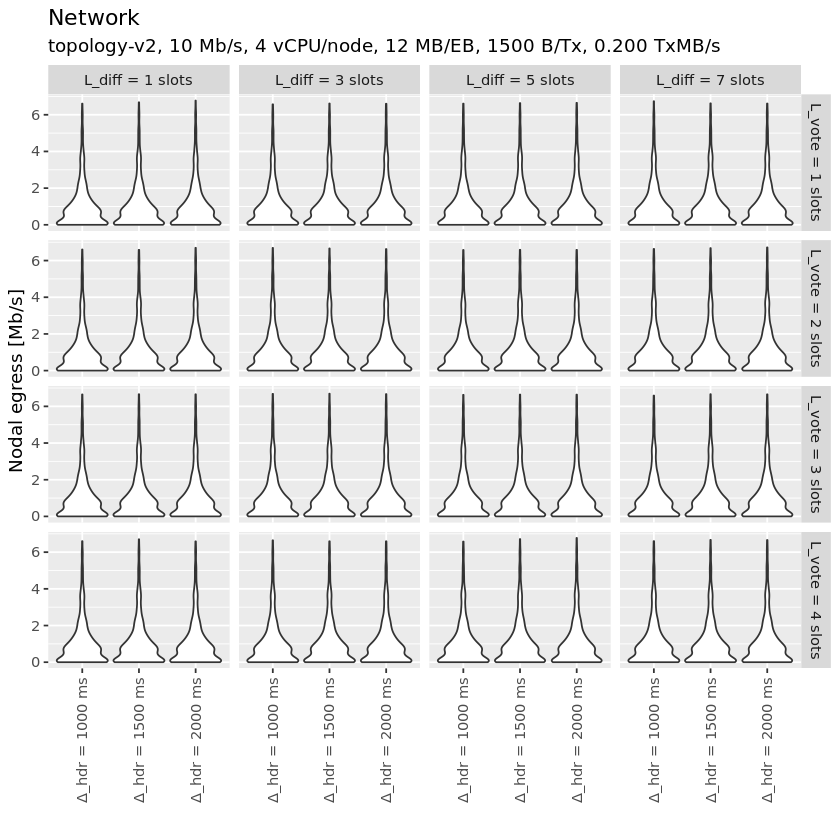

In [36]:
ggplot(
        resources[, .(`VariedX`, `VariedY`, `VariedZ`, `Node`, `Nodal egress [Mb/s]`=8*`Egress [B]`/simFinish/1e6)], 
    aes(x=`VariedZ`, y=`Nodal egress [Mb/s]`)
) +
    geom_violin() +
    facet_grid(`VariedY` ~ `VariedX`) +
    xlab("") +
    ggtitle("Network", label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [37]:
ggsave("plots/network.png", units="in", dpi=150, width=11, height=17)

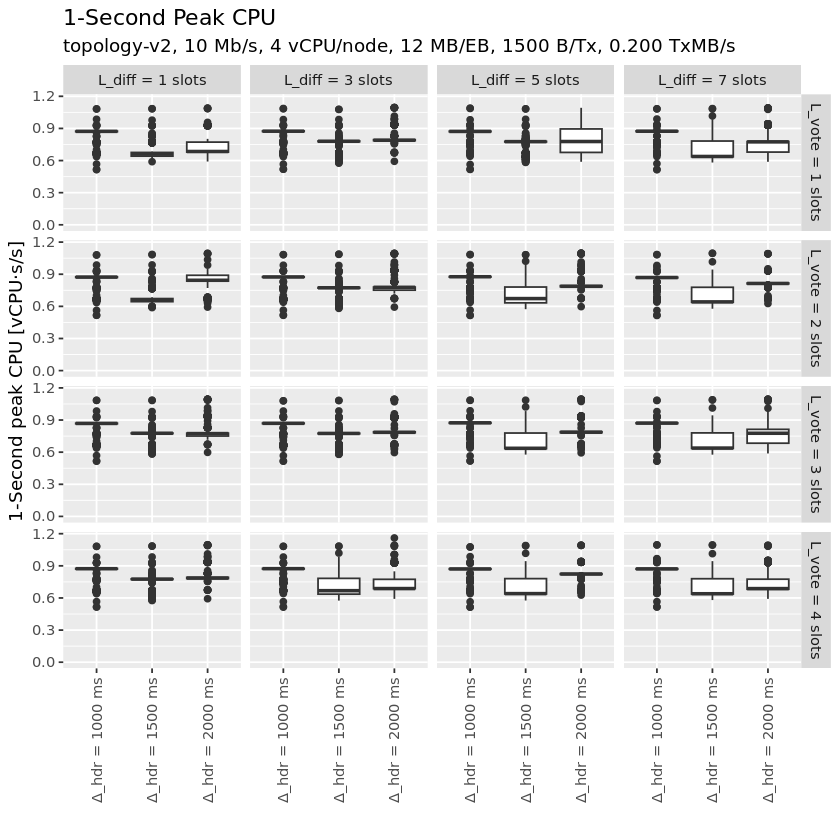

In [38]:
ggplot(
        resources[, .(`VariedX`, `VariedY`, `VariedZ`, `Node`, `1-Second peak CPU [vCPU⋅s/s]`=`Maximum CPU [s/s]`)], 
    aes(x=`VariedZ`, y=`1-Second peak CPU [vCPU⋅s/s]`)
) +
    geom_boxplot() +
    ylim(0, NA) +
    facet_grid(`VariedY` ~ `VariedX`) +
    xlab("") +
    ggtitle("1-Second Peak CPU", label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [39]:
ggsave("plots/cpu-peak.png", units="in", dpi=150, width=11, height=17)

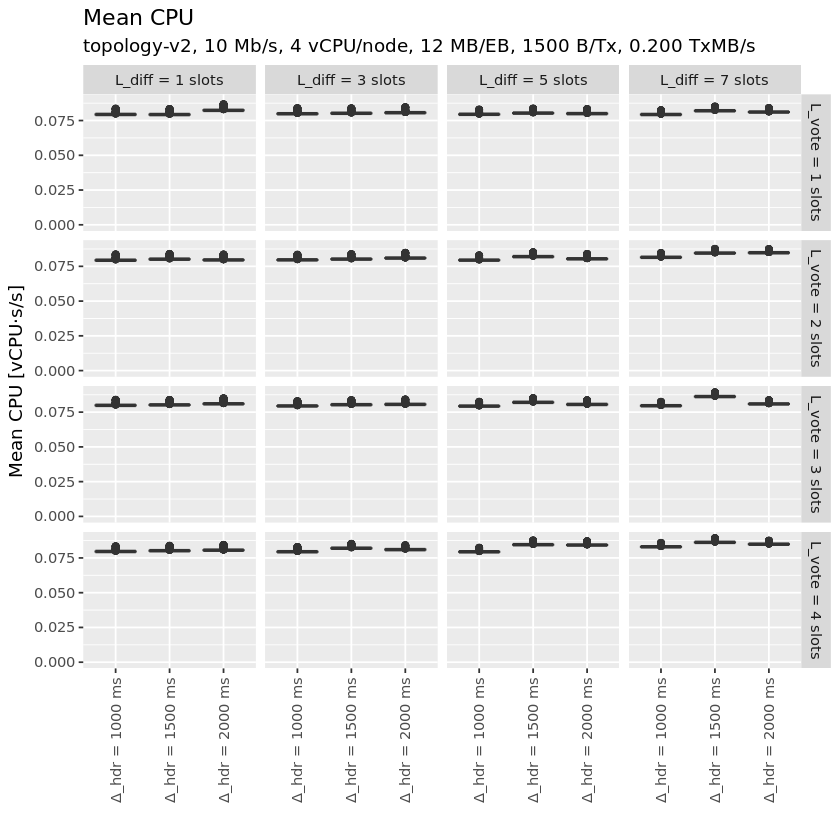

In [40]:
ggplot(
        resources[, .(`VariedX`, `VariedY`, `VariedZ`, `Node`, `Mean CPU [vCPU⋅s/s]`=`Total CPU [s]`/simFinish)], 
    aes(x=`VariedZ`, y=`Mean CPU [vCPU⋅s/s]`)
) +
    geom_boxplot() +
    ylim(0, NA) +
    facet_grid(`VariedY` ~ `VariedX`) +
    xlab("") +
    ggtitle("Mean CPU", label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [41]:
ggsave("plots/cpu-mean.png", units="in", dpi=150, width=11, height=17)

#### Release memory

In [42]:
rm(resources)

In [43]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1039379,55.6,2289898,122.3,2289898,122.3
Vcells,2087273,16.0,149547726,1141.0,233668321,1782.8


### Receipt of messages

#### Read results

In [44]:
if (file.exists("results/receipts.Rdata")) {
    load("results/receipts.Rdata")
    cat(paste("Loaded Rdata file: sampleSize =", sampleSize, "\n"))
} else {
    receipts <- fread("results/receipts.csv.gz", stringsAsFactors=TRUE)
    sampleSize <- 1
    save(receipts, file="results/receipts.Rdata")
    cat(paste("Saved Rdata file: sampleSize =", sampleSize, "\n"))
}
setnames(receipts, old="Kind", new="Message")
receipts <- receipts[`Throughput` == "0.200 TxMB/s"]
receipts %>% summary
receipts[, `:=`(
    `VariedX`=`Diffusion duration`,
    `VariedY`=`Voting duration`,
    `VariedZ`=`Delta header`
)]

Loaded Rdata file: sampleSize = 0.05 


        Network            Bandwidth                  CPU           
 topology-v2:246725242   10 Mb/s:246725242   4 vCPU/node:246725242  
                                                                    
                                                                    
                                                                    
                                                                    
                                                                    
                                                                    
          Delta header             Diffusion duration  
 Δ_hdr = 1000 ms:82032871   L_diff = 1 slots:61528341  
 Δ_hdr = 1500 ms:82480892   L_diff = 3 slots:61588623  
 Δ_hdr = 2000 ms:82211479   L_diff = 5 slots:61677757  
                            L_diff = 7 slots:61930521  
                                                       
                                                       
                                                       


In [45]:
kinds <- receipts[, unique(`Message`) %>% sort]
kinds

[1] EB RB TX VT
Levels: EB RB TX VT

#### Arrival histograms

##### Compare the distributions of elapsed times

In [46]:
arrivalDelayHistogram <- function(rs, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    dtmp <- rs[, .(`VariedX`, `VariedY`, `VariedZ`, `Elapsed [s]`, `Minute created`=factor(floor(`Generated [s]`/60)))]
    ps <- lapply(zs, function(z) {
        ggplot(dtmp[`VariedZ` == z], aes(x=`Elapsed [s]`, fill=`Minute created`)) +
            geom_histogram(binwidth=0.1) +
            facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
            coord_cartesian(xlim=c(0, dtmp[, max(`Elapsed [s]`)])) +
            xlab("Time from generation to receipt at node [s]") +
            ylab("Number received") +
            ggtitle(z) +
            theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())
    })
    lapply(ps, print) %>% invisible
    g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
        draw_label(title, hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
        draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

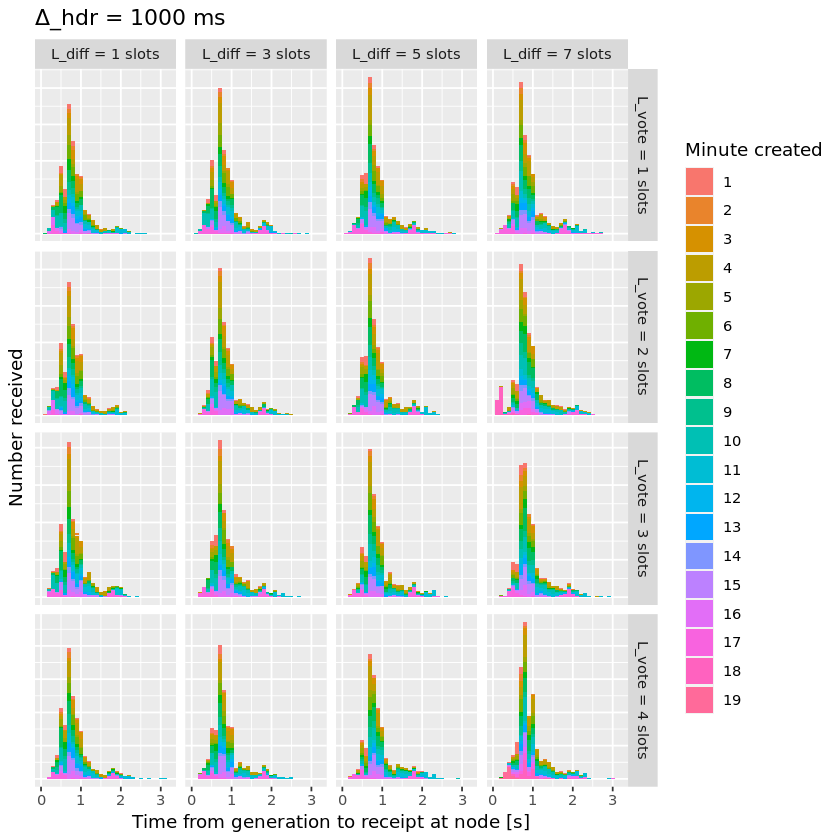

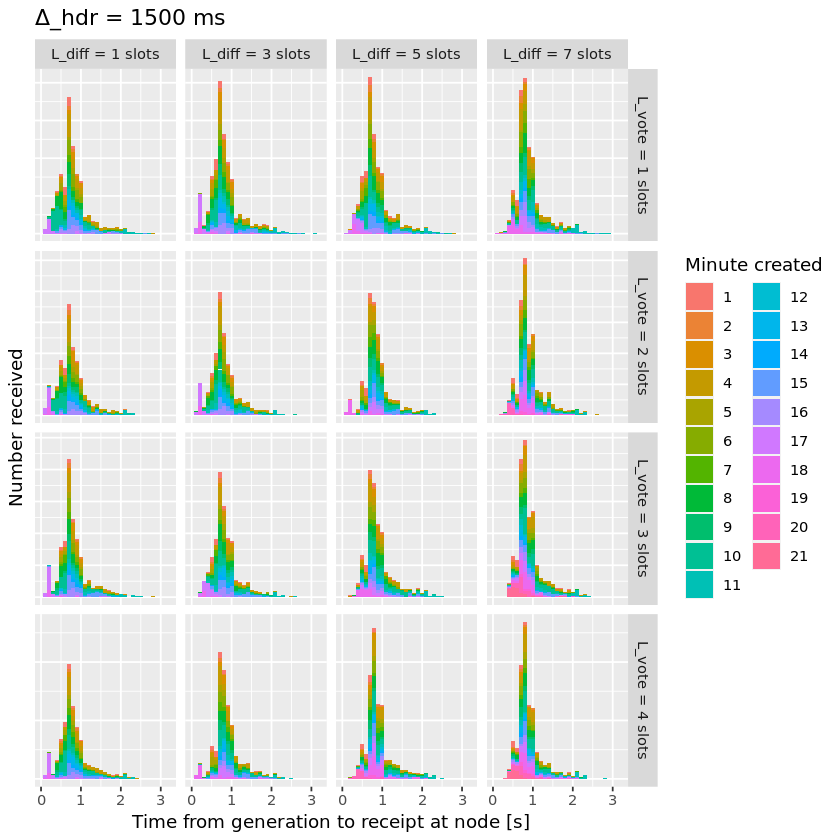

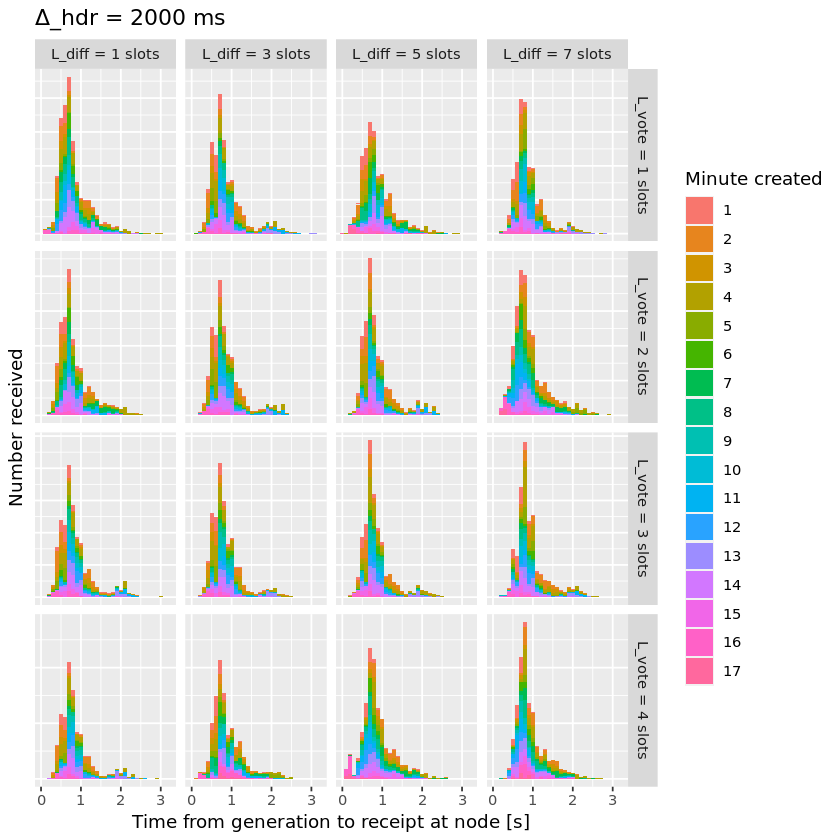

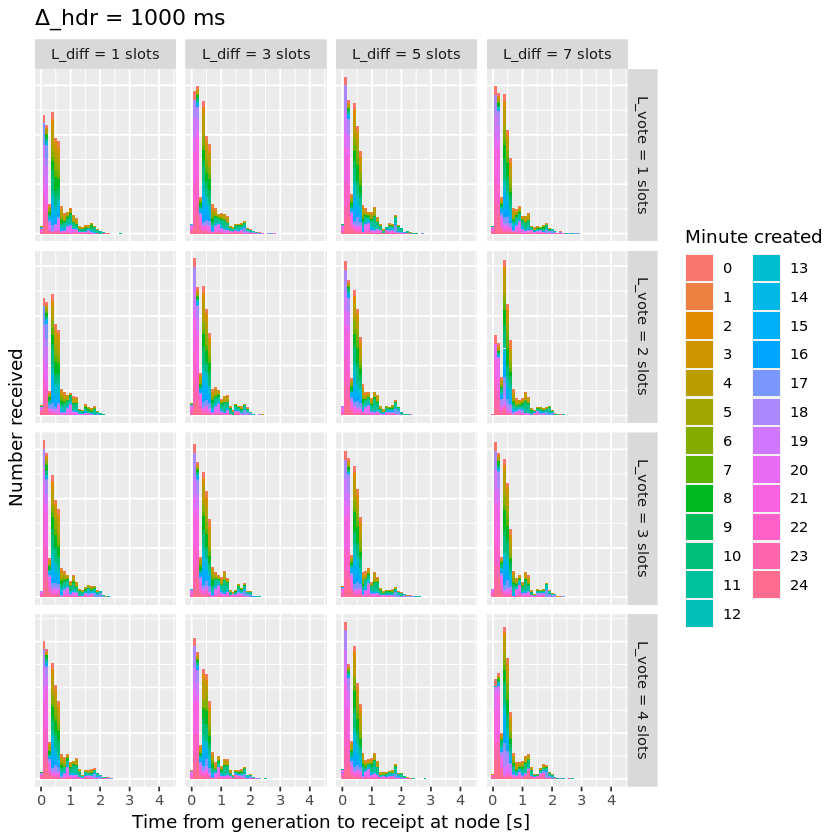

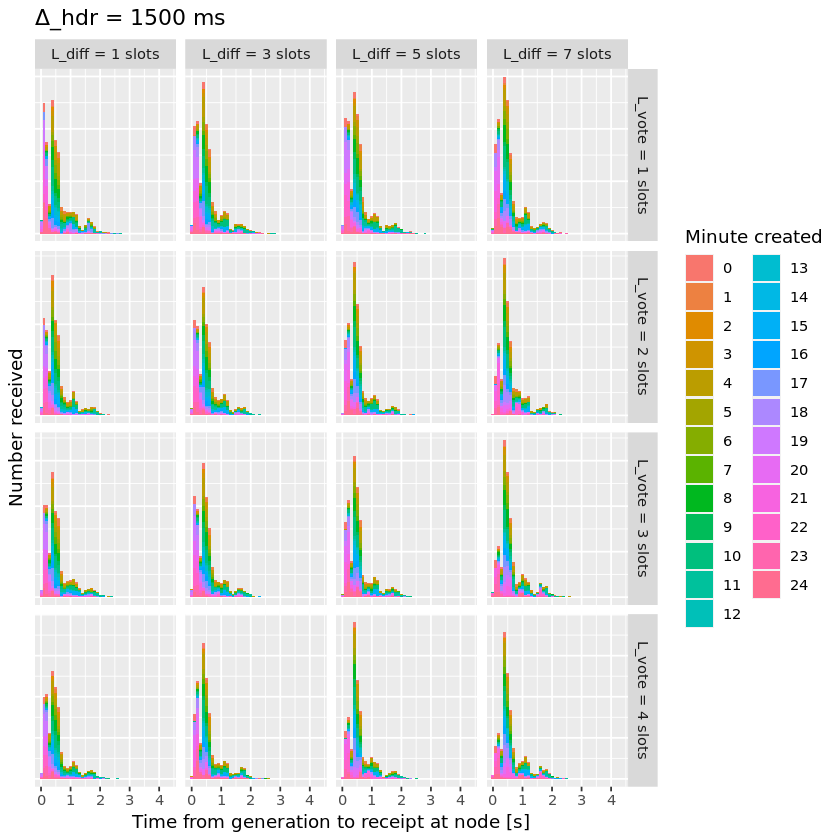

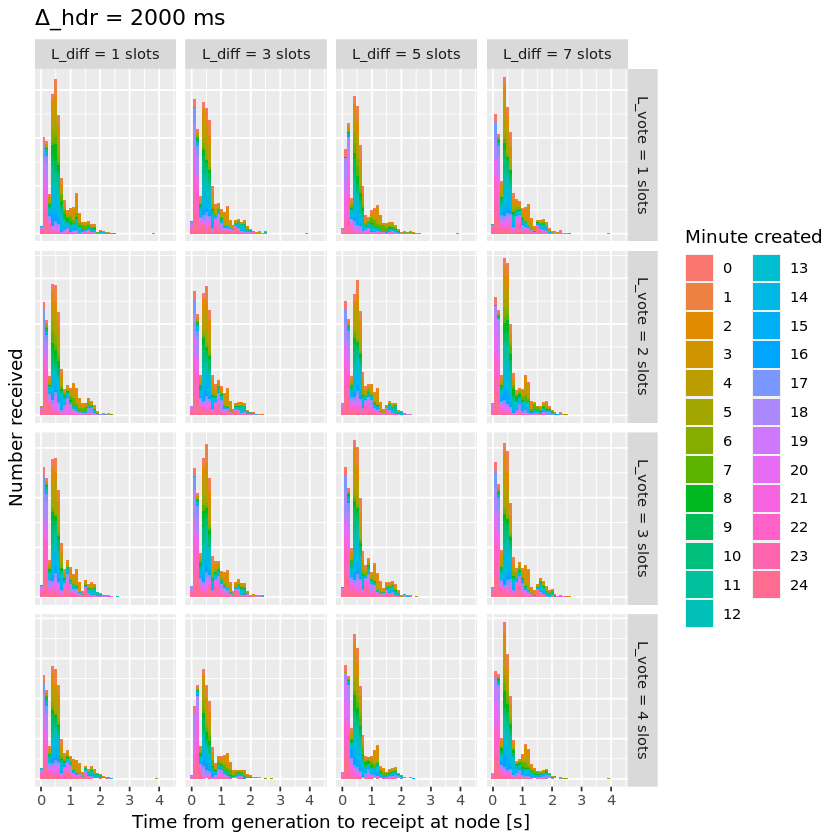

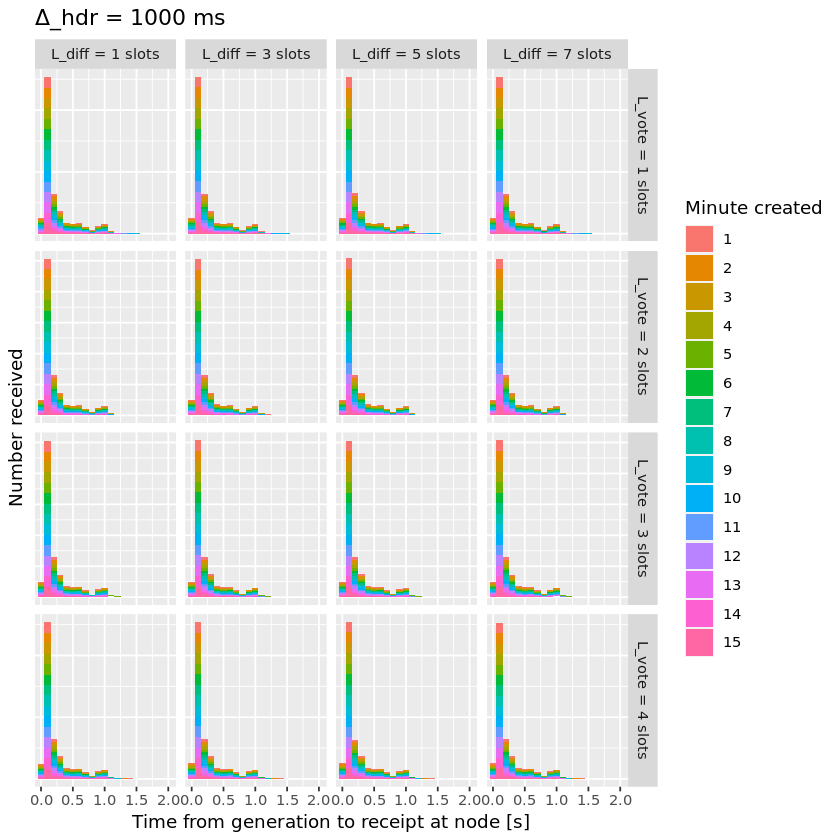

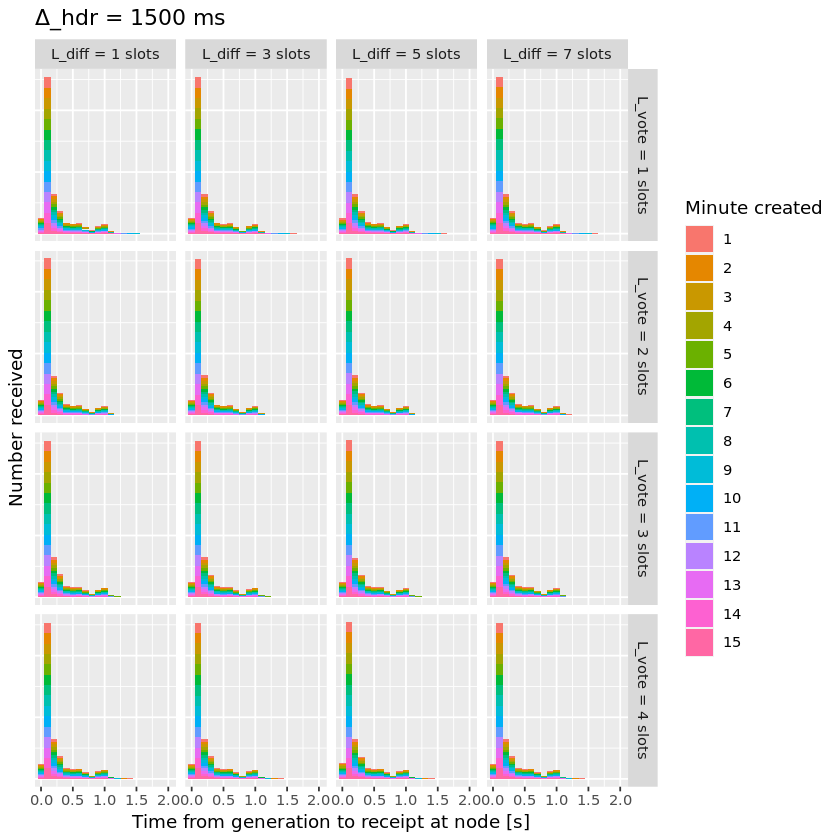

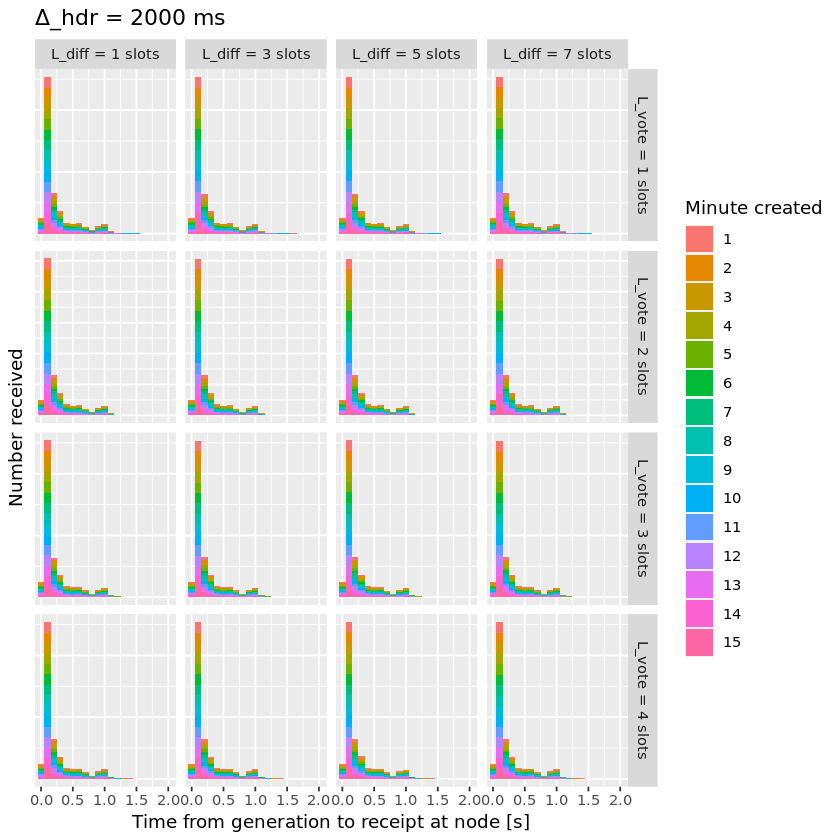

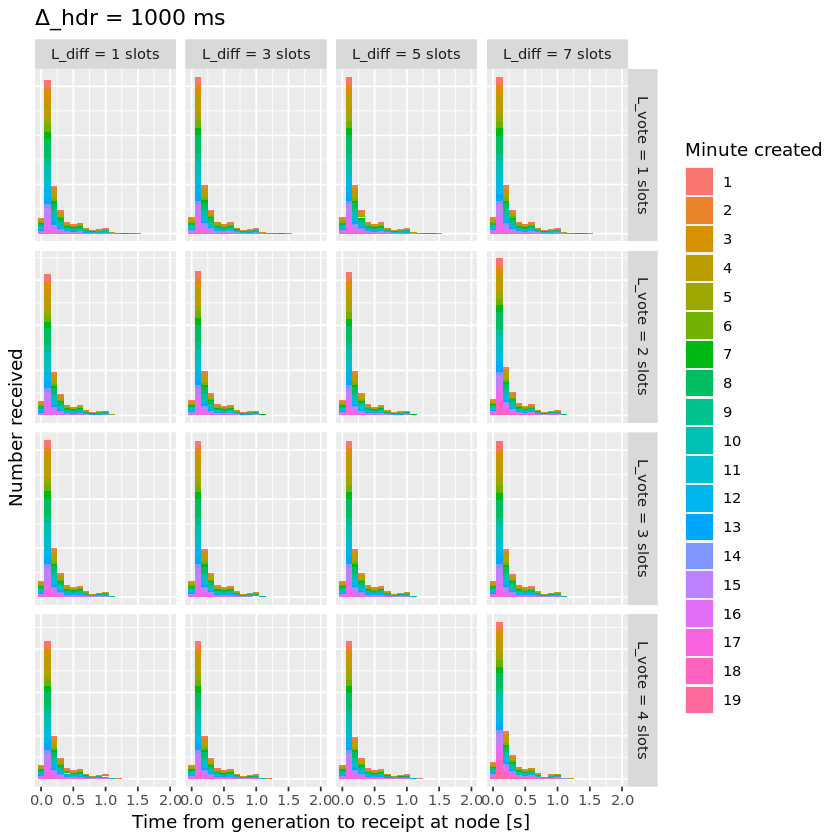

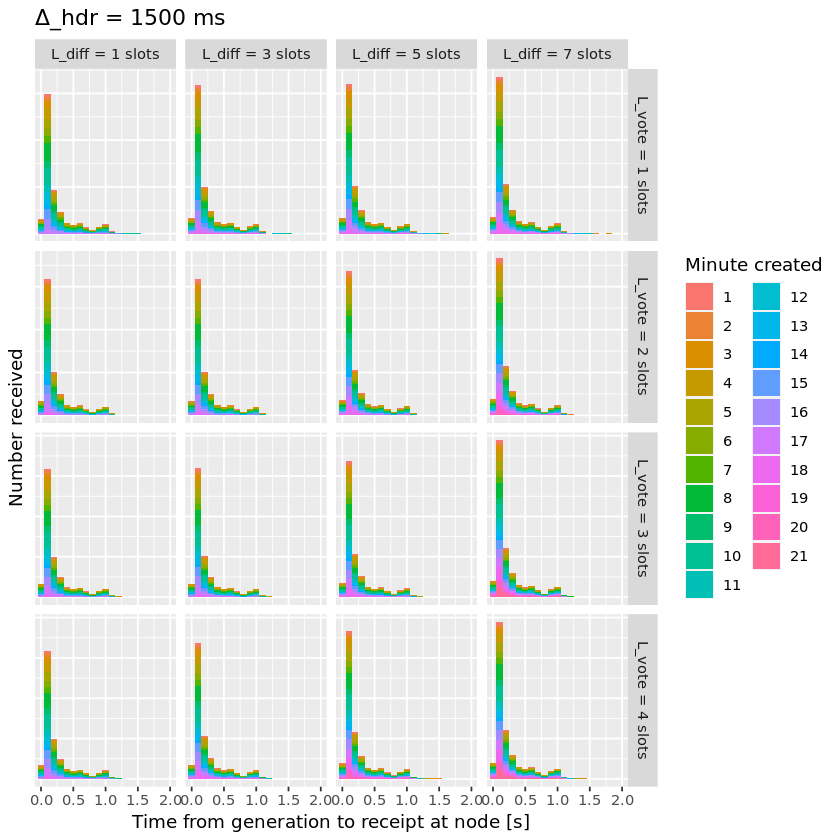

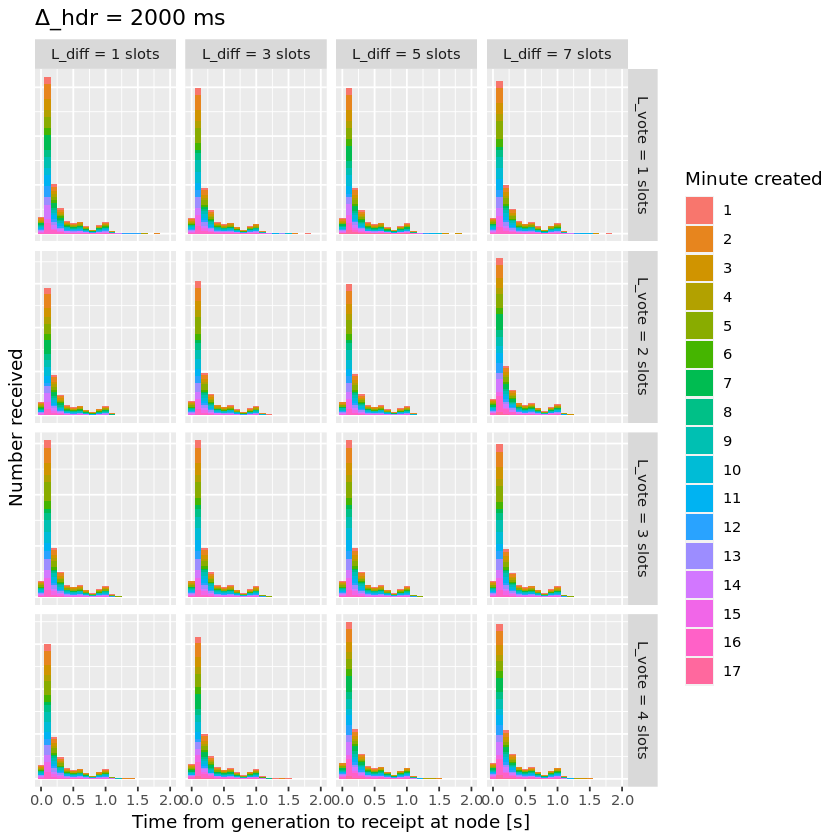

In [47]:
for (k in kinds)
    arrivalDelayHistogram(
        receipts[`Message` == k],
        paste("Arrival delay for", k),
        scales="free_y",
        outfiles=paste0("plots/elapsed-", k, ".png")
    )

#### Bandwidth usage

##### Bandwidth usage per node

In [48]:
nodeCount <- receipts[, length(unique(`Recipient`))]
nodeCount

[1] 750

In [49]:
meanNodalIngressPlot <- function(rs, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    dtmp <-
        rs[,
                .(`Size [Mb/node]`=8*sum(`Size [B]`)/1e6/nodeCount/sampleSize),
                by=.(`VariedX`, `VariedY`, `VariedZ`, `Slot`=floor(`Received [s]`), `Message`)
            ]
    ps <- lapply(zs, function(z) {
        ggplot(dtmp[`VariedZ` == z], aes(x=`Slot`, y=`Size [Mb/node]`, fill=`Message`)) +
            geom_area() +
            facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
            coord_cartesian(ylim=c(0, dtmp[, max(`Size [Mb/node]`)])) +
            xlab("Slot [s]") +
            ylab("Mean network ingress among nodes [Mb/s]") +
            ggtitle(z)
    })
    lapply(ps, print) %>% invisible
    g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
        draw_label(title, hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
        draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

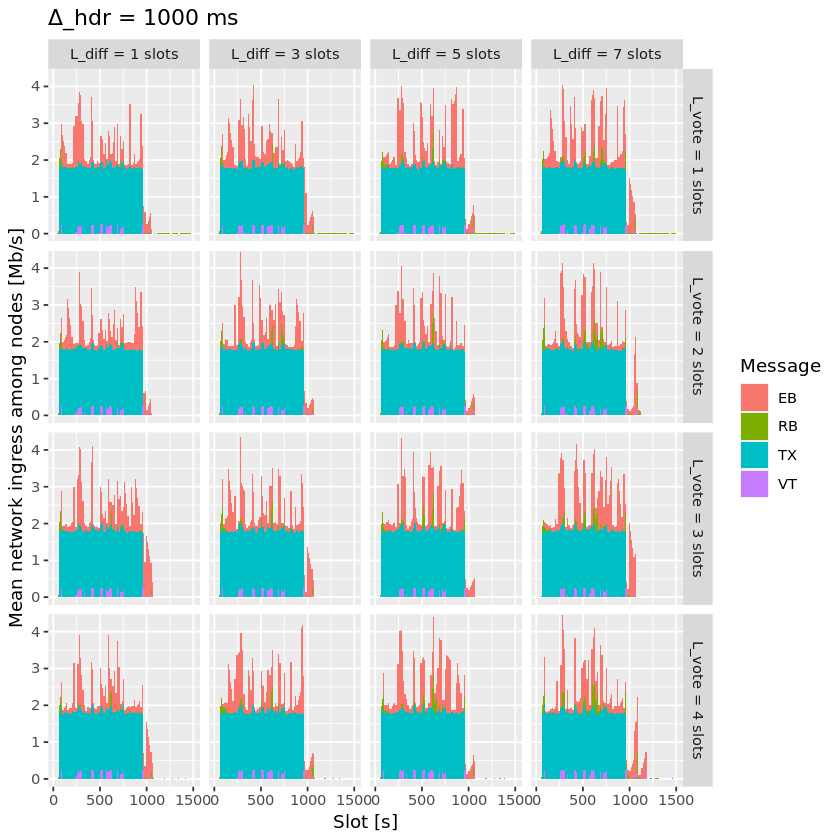

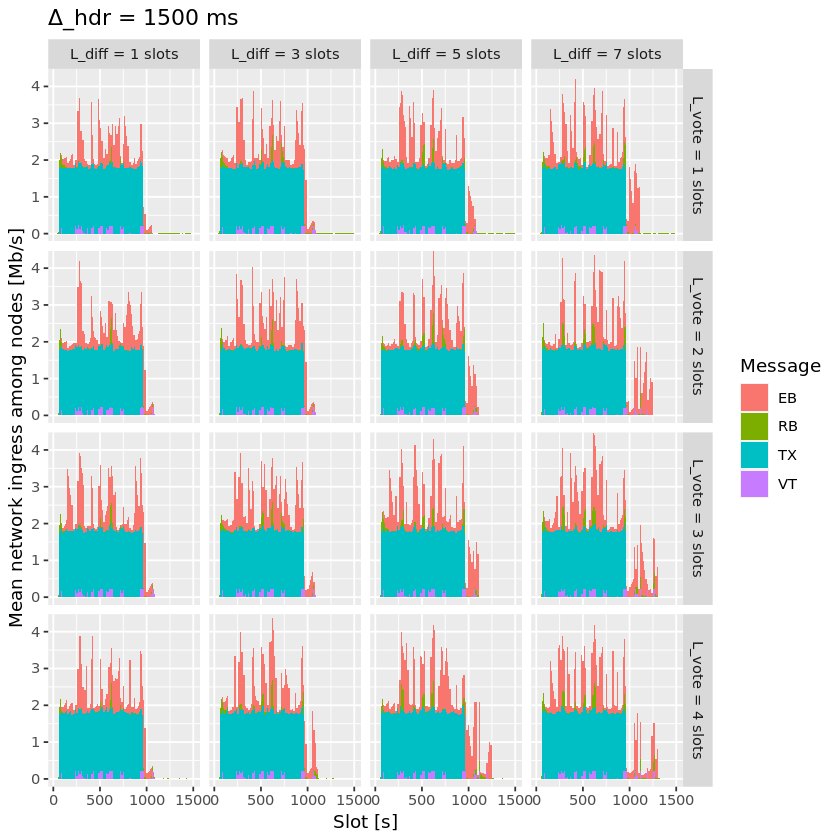

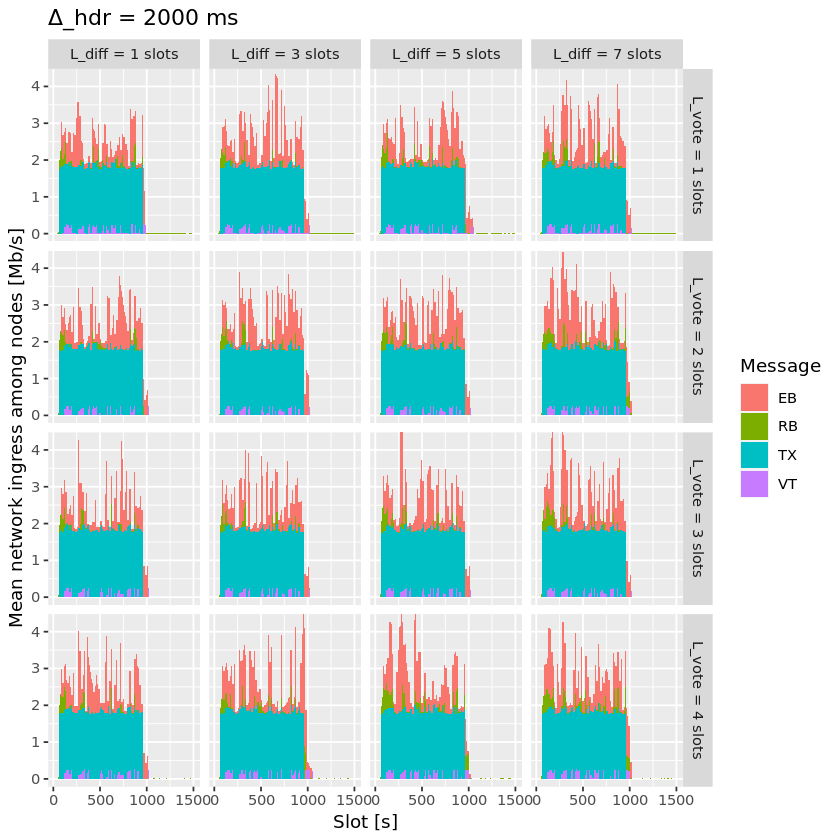

In [50]:
meanNodalIngressPlot(
    receipts, 
    "Mean nodal ingress",
    scales="fixed",
    outfiles=paste0("plots/ingress-average-area.png")
)

In [51]:
peakNodalIngressPlot <- function(rs, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    dtmp <-
        rs[,
                .(`Size [Mb]`=8*sum(`Size [B]`, rm.na=TRUE)/1e6/sampleSize),
                by=.(`VariedX`, `VariedY`, `VariedZ`, `Slot`=floor(`Received [s]`), `Message`, `Recipient`)
            ][,
                .(`Size [Mb]`=max(`Size [Mb]`)),
                by=.(`VariedX`, `VariedY`, `VariedZ`, `Slot`, `Message`)
            ]
    ps <- lapply(zs, function(z) {
        ggplot(dtmp[`VariedZ` == z], aes(x=`Slot`, y=`Size [Mb]`, color=`Message`)) +
            geom_point(size=0.5) +
            facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
            coord_cartesian(ylim=c(0, dtmp[, max(`Size [Mb]`)])) +
            xlab("Slot [s]") +
            ylab("Maximum network ingress among nodes [Mb/s]") +
            ggtitle(z)
    })
    lapply(ps, print) %>% invisible
    g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
        draw_label(title, hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
        draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

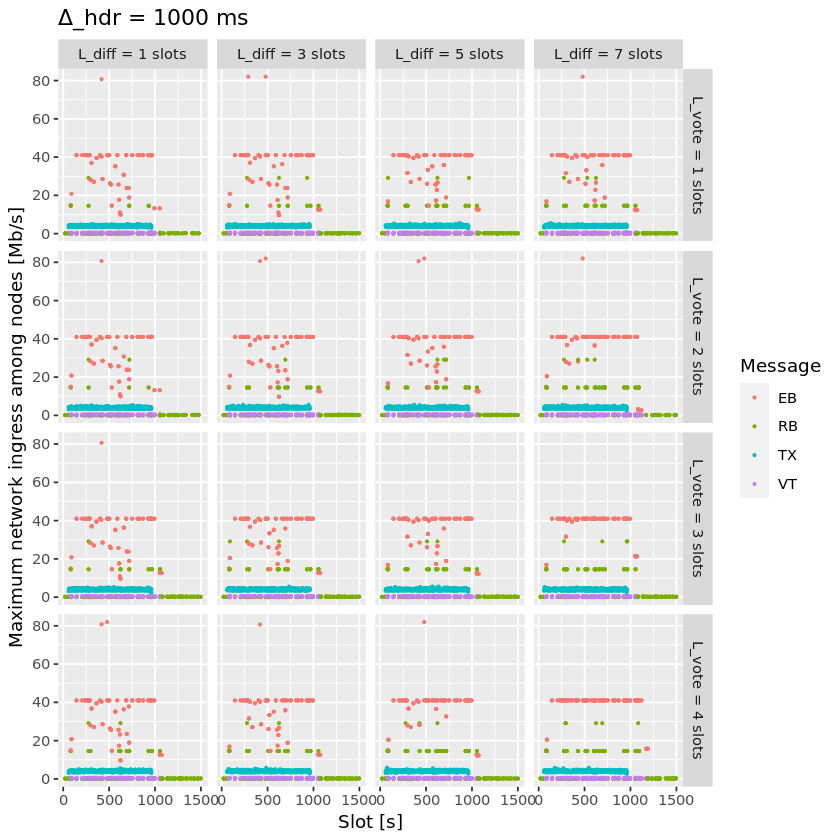

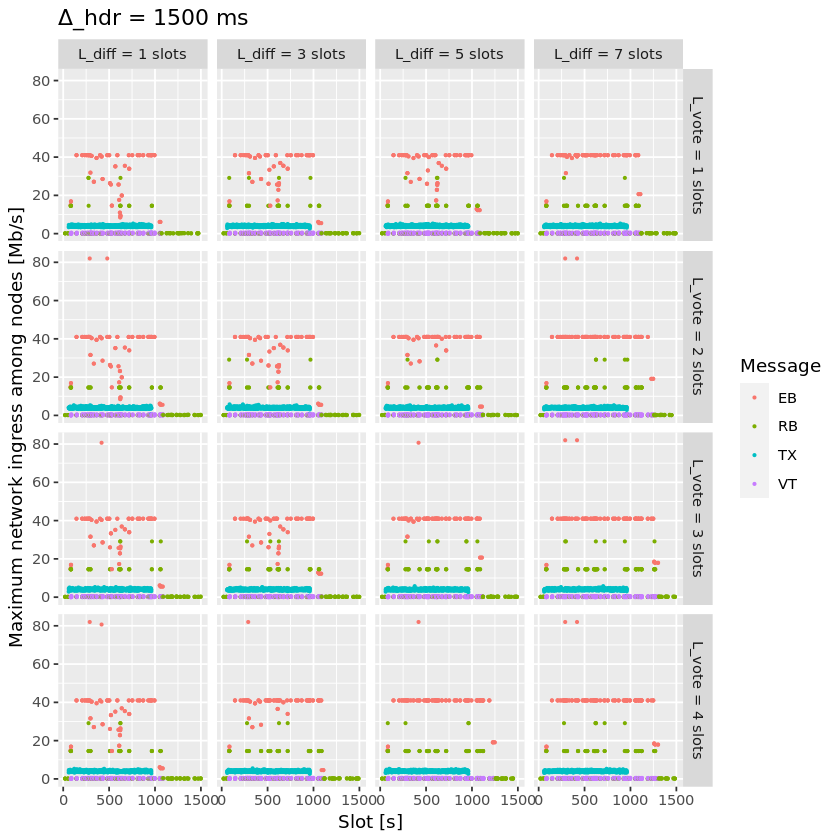

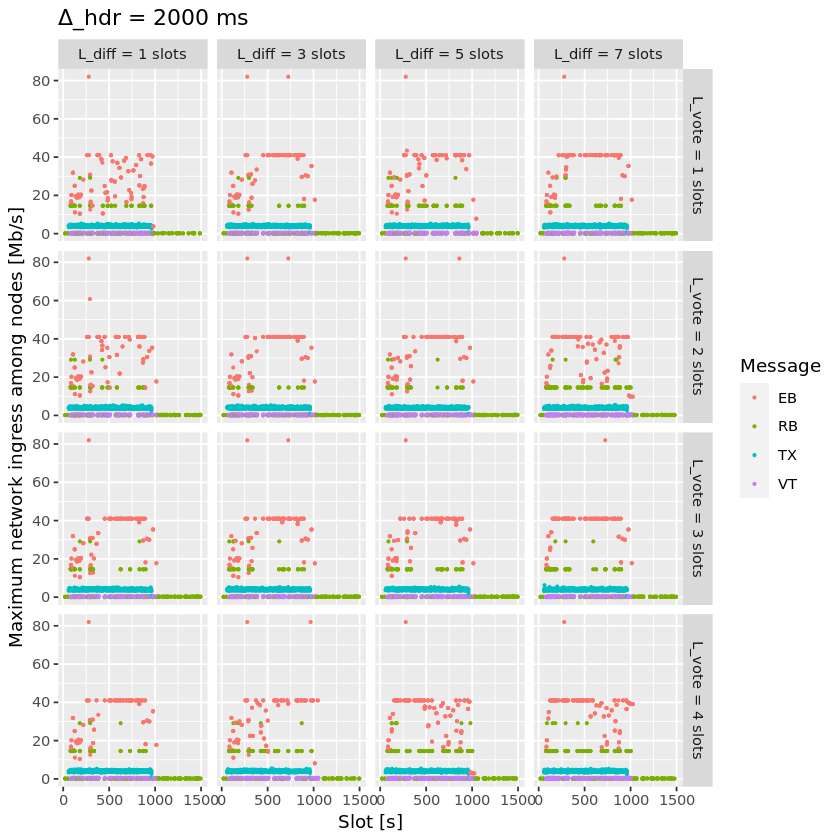

In [52]:
peakNodalIngressPlot(
    receipts, 
    "Peak nodal ingress",
    outfiles=paste0("plots/ingress-peak-point.png")
)

#### Release memory

In [53]:
rm(receipts)

In [54]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1248372,66.7,3588282,191.7,4485352,239.6
Vcells,3457713207,26380.3,9887827668,75438.2,12359784585,94297.7


### CPU usage

#### Read results

In [55]:
if (file.exists("results/cpus.Rdata")) {
    load(file="results/cpus.Rdata")
    cat(paste("Loaded Rdata file: sampleSize =", sampleSize, "\n"))
} else {
    cpus <- fread("results/cpus.csv.gz", stringsAsFactors=TRUE)
    sampleSize <- 1
    save(cpus, file="results/cpus.Rdata")
    cat(paste("Saved Rdata file: sampleSize =", sampleSize, "\n"))
}
cpus <- cpus[`Throughput` == "0.200 TxMB/s"]
cpus %>% summary
cpus[, `:=`(
    `VariedX`=`Diffusion duration`,
    `VariedY`=`Voting duration`,
    `VariedZ`=`Delta header`
)]

Loaded Rdata file: sampleSize = 0.05 


        Network            Bandwidth                  CPU           
 topology-v2:246980215   10 Mb/s:246980215   4 vCPU/node:246980215  
                                                                    
                                                                    
                                                                    
                                                                    
                                                                    
                                                                    
          Delta header             Diffusion duration  
 Δ_hdr = 1000 ms:82112174   L_diff = 1 slots:61590495  
 Δ_hdr = 1500 ms:82560717   L_diff = 3 slots:61650964  
 Δ_hdr = 2000 ms:82307324   L_diff = 5 slots:61741533  
                            L_diff = 7 slots:61997223  
                                                       
                                                       
                                                       


In [56]:
cpusNode <-
        cpus[
            ,
            .(`Duration [s]`=sum(`Duration [s]`)),
            by=.(`VariedX`, `VariedY`, `VariedZ`, `Node`, `Slot`)
        ]

In [57]:
nodeCount <- cpusNode[, length(unique(`Node`))]
nodeCount

[1] 750

#### Peak CPU usage

##### Histogram

In [58]:
peakCpuHistogram <- function(cs, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    dtmp <-
    cs[,
            .(`Duration [%]`=100*max(`Duration [s]`)),
            by=.(`VariedX`, `VariedY`, `VariedZ`, `Slot`)
        ]
    ps <- lapply(zs, function(z) {
        ggplot(dtmp[`VariedZ` == z], aes(x=`Duration [%]`)) +
            geom_histogram(binwidth=10) +
            facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
            coord_cartesian(xlim=c(0, dtmp[, max(`Duration [%]`)])) +
            xlab("Peak CPU load [%]") +
            ylab("Number of slots") +
            ggtitle(z)
    })
    lapply(ps, print) %>% invisible
    g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
        draw_label(title, hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
        draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

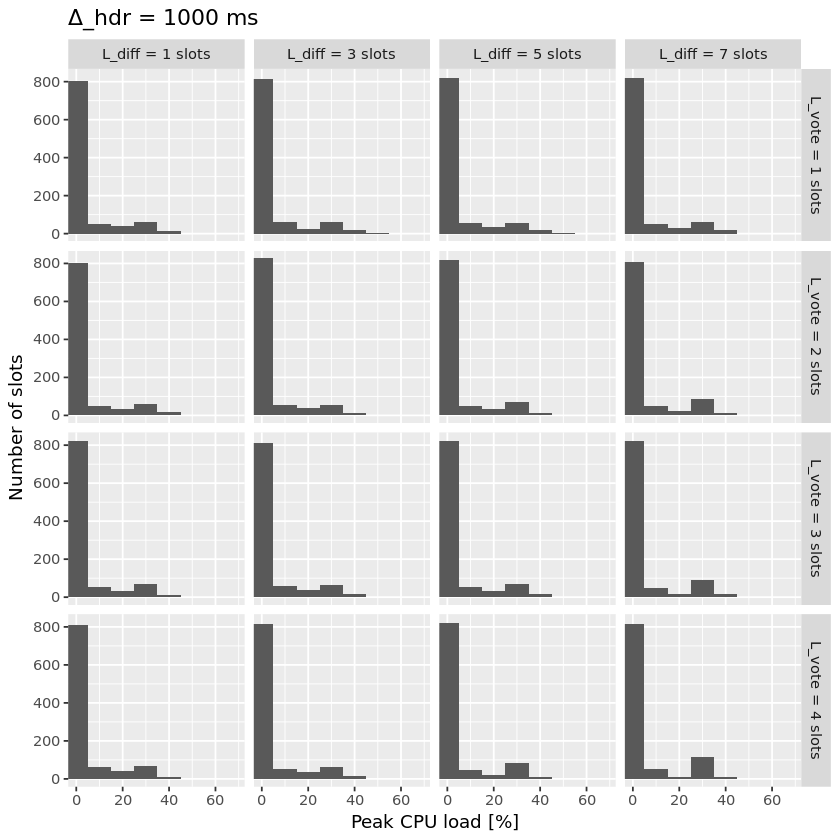

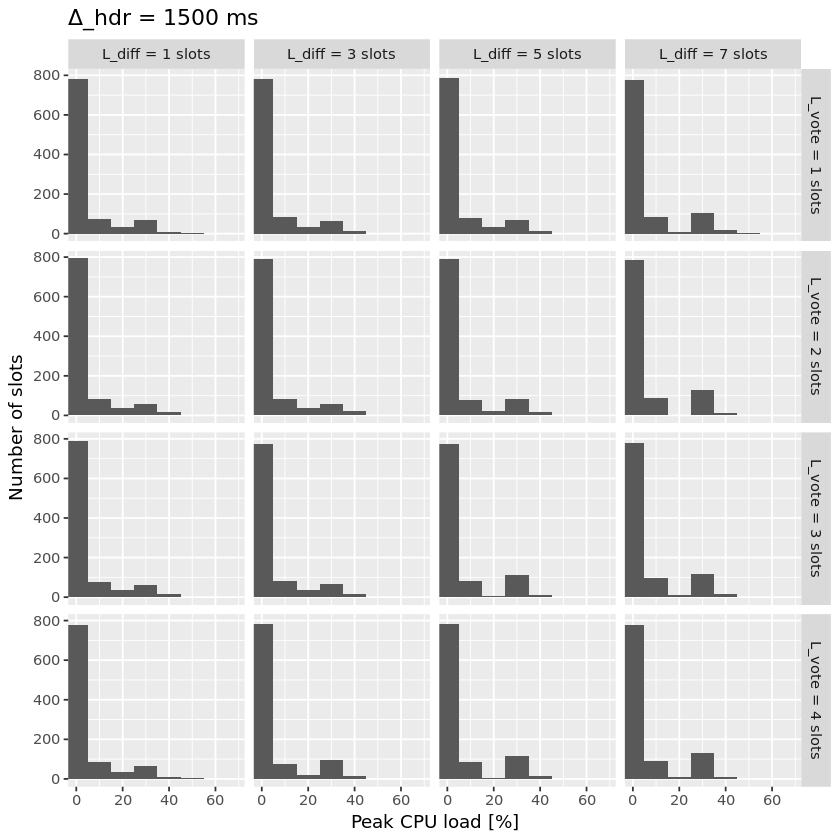

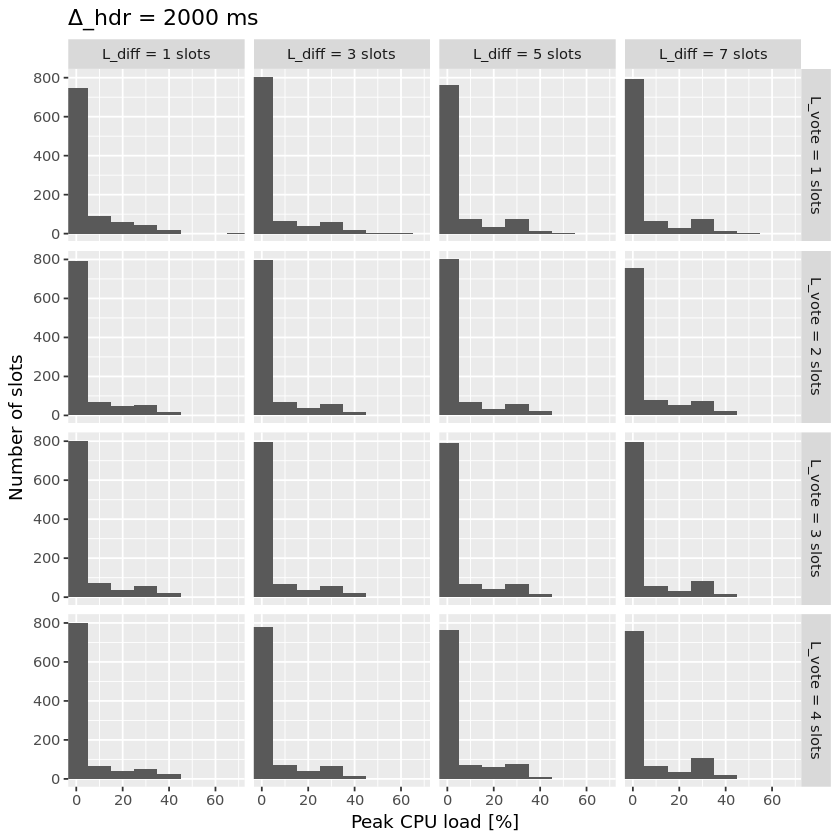

In [59]:
peakCpuHistogram(
    cpusNode, 
    "Peak CPU load among all nodes",
    scales="fixed",
    outfiles=paste0("plots/cpu-peak-histogram.png")
)

#### Mean CPU usage

##### Histogram

In [60]:
meanCpuHistogram <- function(cs, nodeSeconds, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    g <- ggplot(
        cs[,
            .(`Duration [%]`=100*sum(`Duration [s]`)/nodeSeconds/nodeCount),
            by=.(`VariedX`, `VariedY`, `VariedZ`, `Task`)
        ], aes(x=`VariedZ`, fill=`Task`, y=`Duration [%]`)) +
        geom_bar(stat = "identity") +
        facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
        xlab("") +
        ylab("Mean CPU load [%]") +
        ggtitle(title, label)
    g %>% print
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

In [61]:
meanCpuHistogram <- function(cs, nodeSeconds, title="", scales="fixed", outfiles=c(), width=11, height=17, dpi=150) {
    dtmp <-
        cs[,
                .(`Duration [%]`=100*sum(`Duration [s]`)/nodeSeconds/nodeCount),
                by=.(`VariedX`, `VariedY`, `VariedZ`, `Task`)
            ]
    ps <- lapply(zs, function(z) {
        ggplot(dtmp[`VariedZ` == z], aes(x="", fill=`Task`, y=`Duration [%]`)) +
            geom_bar(stat = "identity") +
            facet_grid(`VariedY` ~ `VariedX`, scales=scales) +
            coord_cartesian(ylim=c(0, dtmp[, max(`Duration [%]`)])) +
            xlab("") +
            ylab("Mean CPU load [%]") +
            ggtitle(z)
    })
    lapply(ps, print) %>% invisible
    g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
        draw_label(title, hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
        draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
    for (outfile in outfiles)
        ggsave(outfile, units="in", width=width, height=height, dpi=dpi)
}

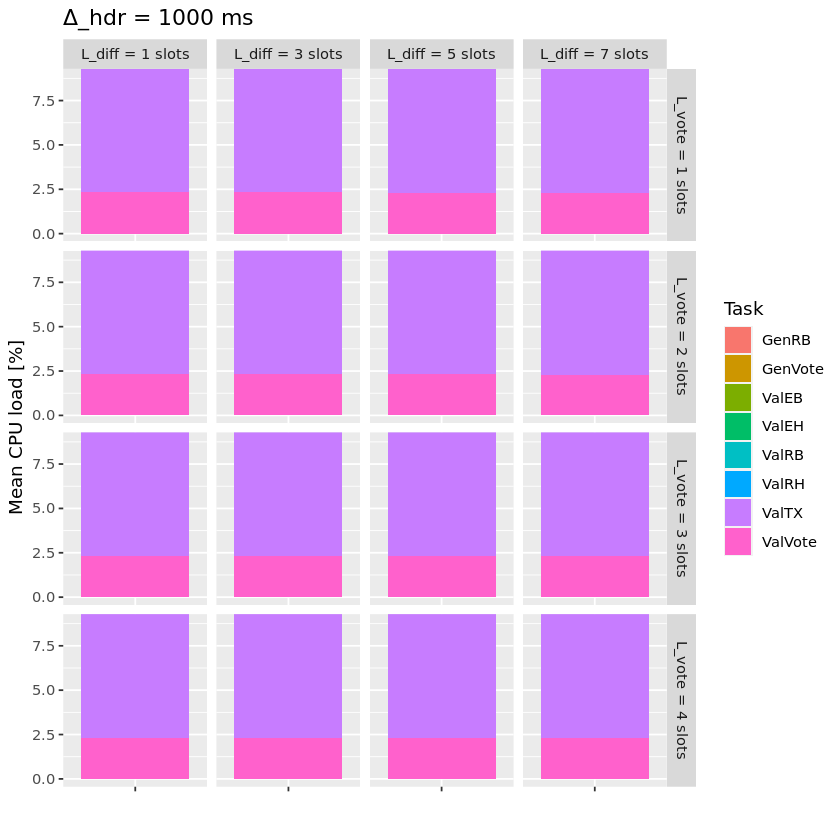

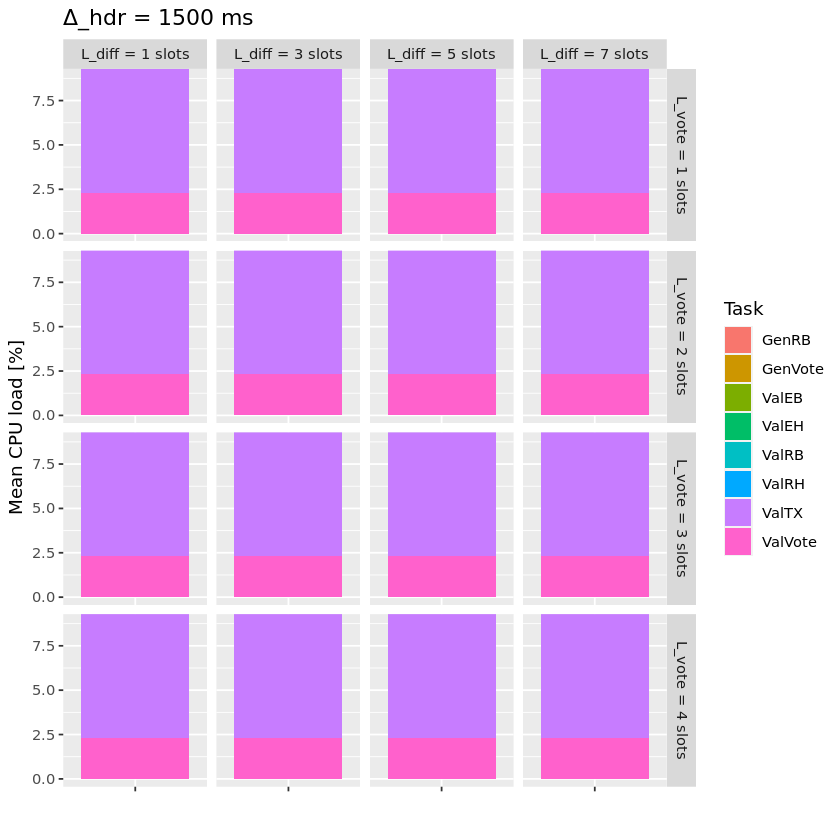

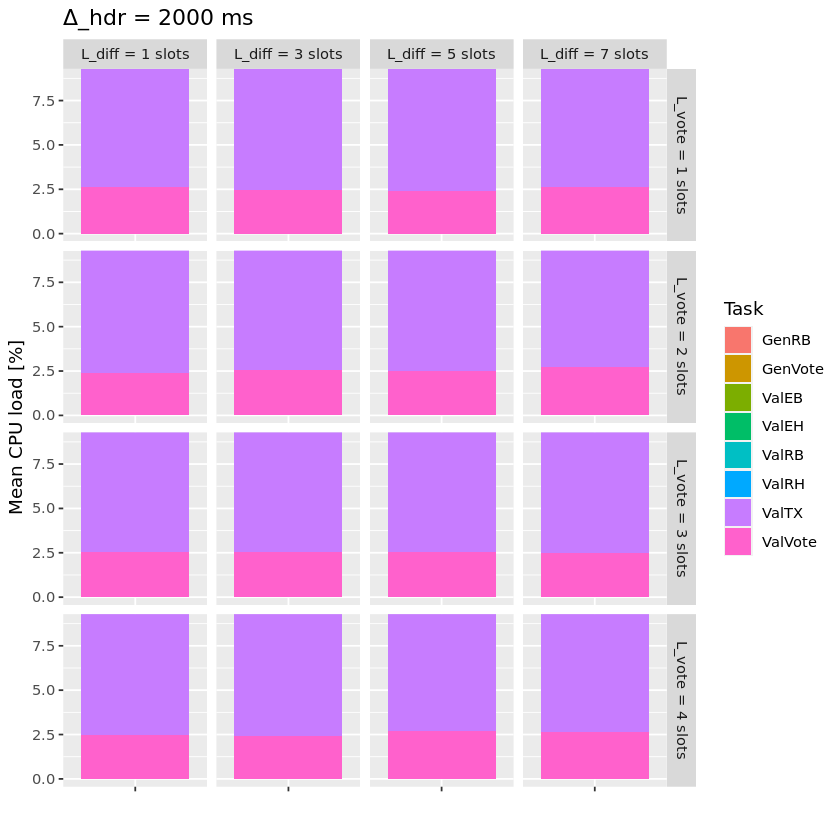

In [62]:
meanCpuHistogram(
    cpus[`Slot` >= txFirst & `Slot` < txLast],
    txWindow * sampleSize, 
    "Mean CPU load among all nodes", 
    scales="fixed",
    outfiles=paste0("plots/cpu-mean-histogram.png")
)

#### Release memory

In [63]:
rm(cpus, cpusNode)

In [64]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1094034,58.5,3588282,191.7,4485352,239.6
Vcells,2571212268,19616.8,7910262135,60350.6,12359784585,94297.7


### Block contents

### Read data

In [65]:
if (file.exists("results/sizes.Rdata")) {
    load(file="results/sizes.Rdata")
    cat(paste("Loaded Rdata file: sampleSize =", sampleSize, "\n"))
} else {
    sizes <- fread("results/sizes.csv.gz", stringsAsFactors=TRUE)
    sampleSize <- 1
    save(sizes, file="results/sizes.Rdata")
    cat(paste("Saved Rdata file: sampleSize =", sampleSize, "\n"))
}
setnames(sizes, old="Kind", new="Message")
sizes <- sizes[`Throughput` == "0.200 TxMB/s"]
sizes %>% summary
sizes[, `:=`(
    `VariedX`=`Diffusion duration`,
    `VariedY`=`Voting duration`,
    `VariedZ`=`Delta header`
)]

Loaded Rdata file: sampleSize = 1 


        Network       Bandwidth             CPU                Delta header 
 topology-v2:6340   10 Mb/s:6340   4 vCPU/node:6340   Δ_hdr = 1000 ms:1968  
                                                      Δ_hdr = 1500 ms:1964  
                                                      Δ_hdr = 2000 ms:2408  
                                                                            
                                                                            
                                                                            
                                                                            
        Diffusion duration         Voting duration   Max EB size  
 L_diff = 1 slots:1544     L_vote = 1 slots:1553   12 MB/EB:6340  
 L_diff = 3 slots:1561     L_vote = 2 slots:1580                  
 L_diff = 5 slots:1593     L_vote = 3 slots:1580                  
 L_diff = 7 slots:1642     L_vote = 4 slots:1627                  
                                                 

In [66]:
txSize <- sizes[, as.numeric(sub(" .*$", "", unique(`Tx size`)))]
txSize

[1] 1500

### EB contents

#### Sizes

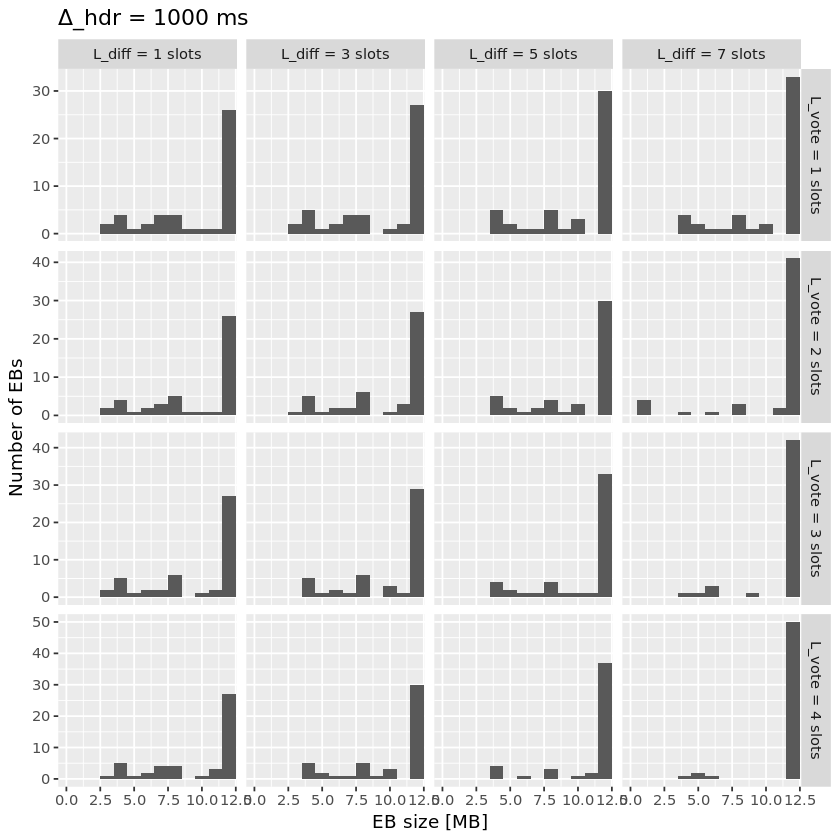

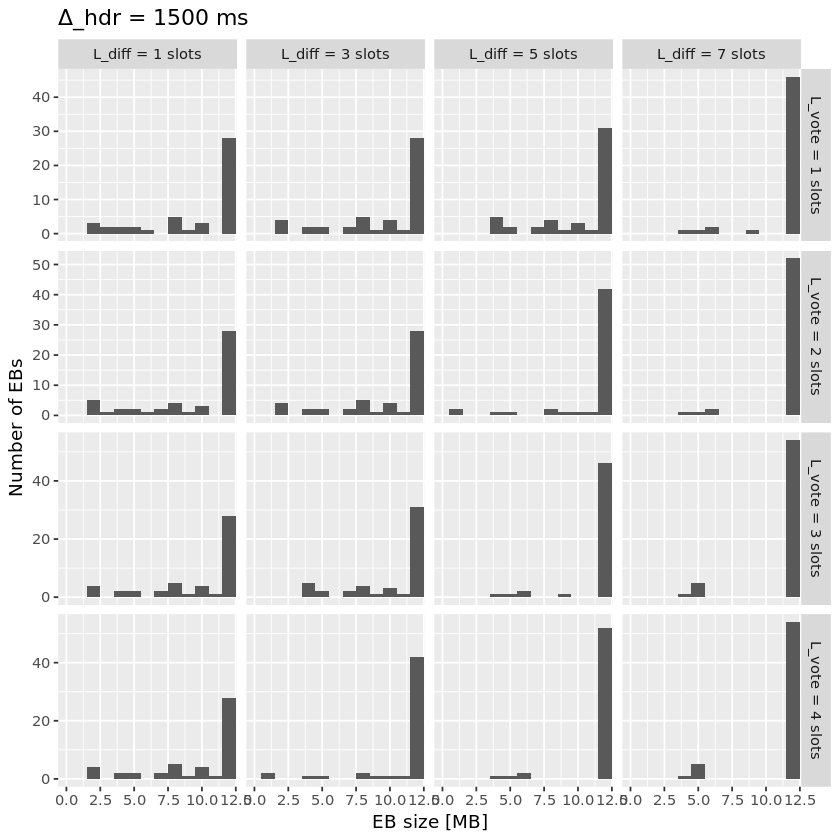

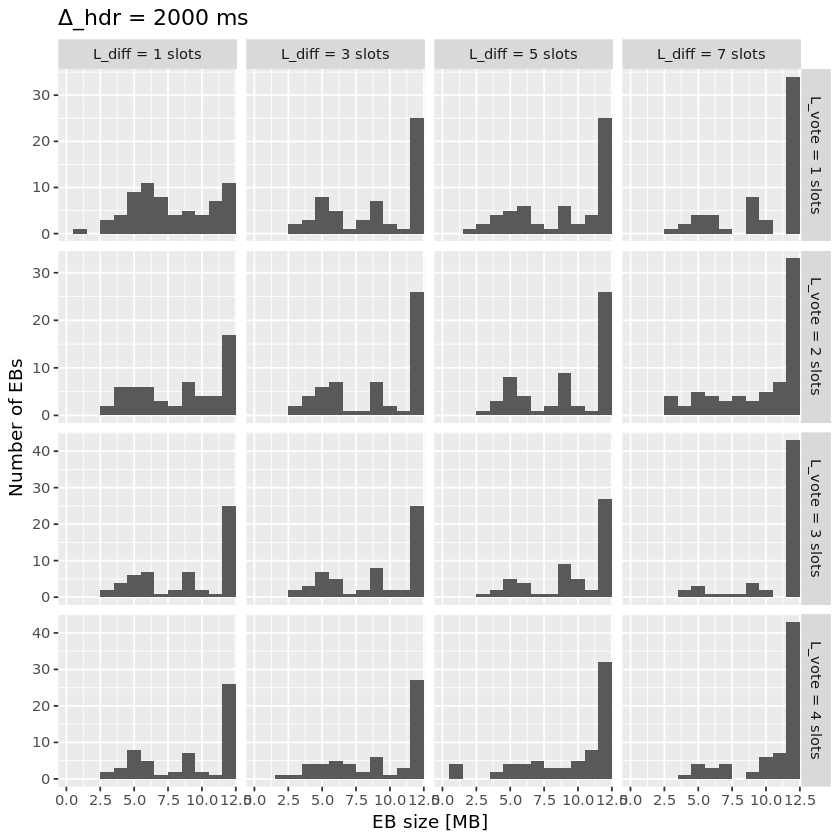

In [67]:
dtmp <-
    sizes[`Message` == "EB", .(`EB size [MB]`=`Transactions`*txSize/1e6), .(`VariedX`, `VariedY`, `VariedZ`)]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`EB size [MB]`)) +
        geom_histogram(binwidth=1) +
        facet_grid(`VariedY` ~ `VariedX`, scales="free_y") +
        coord_cartesian(xlim=c(0, dtmp[, max(`EB size [MB]`)])) +
        ylab("Number of EBs") +
        ggtitle(z)
})
lapply(ps, print) %>% invisible

In [68]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Size of transactions in EBs", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/contents-ebs-size.png", units="in", dpi=150, width=11, height=17)

### RB contents

#### Sizes

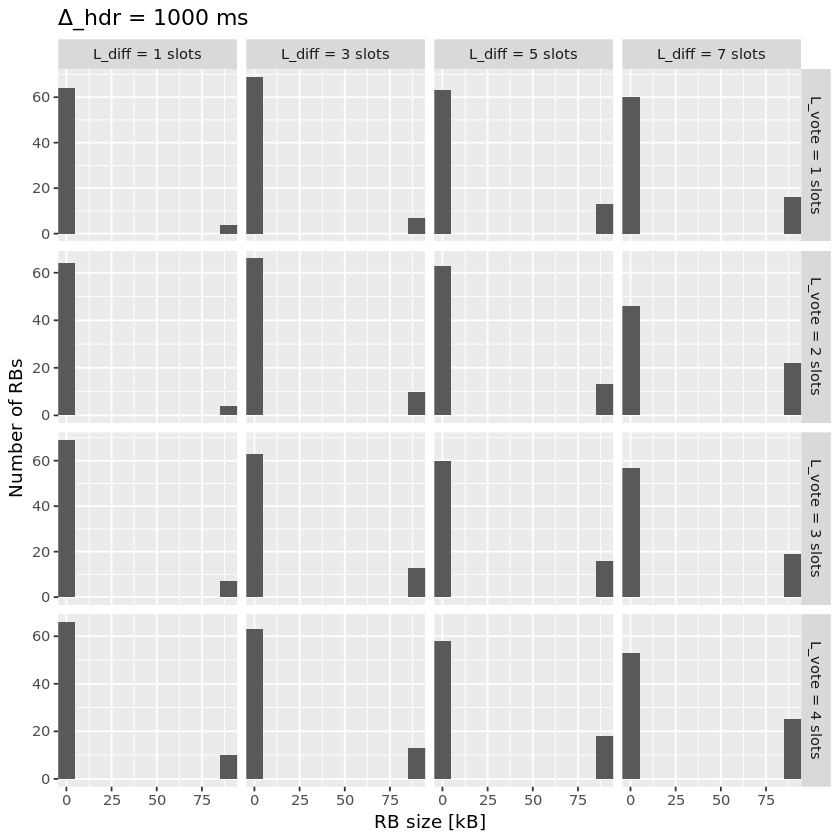

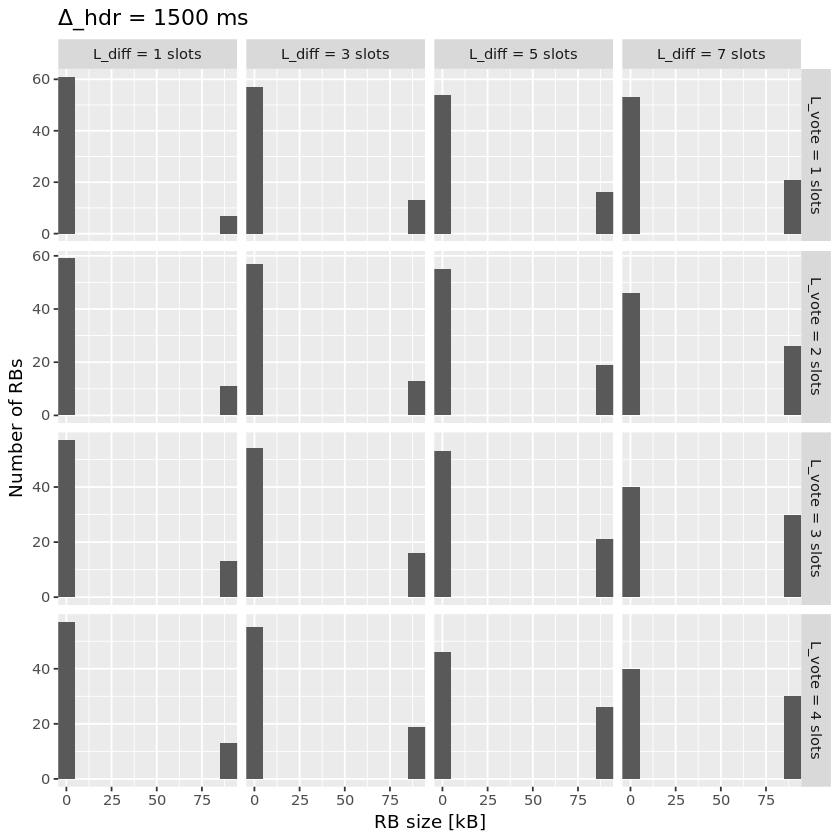

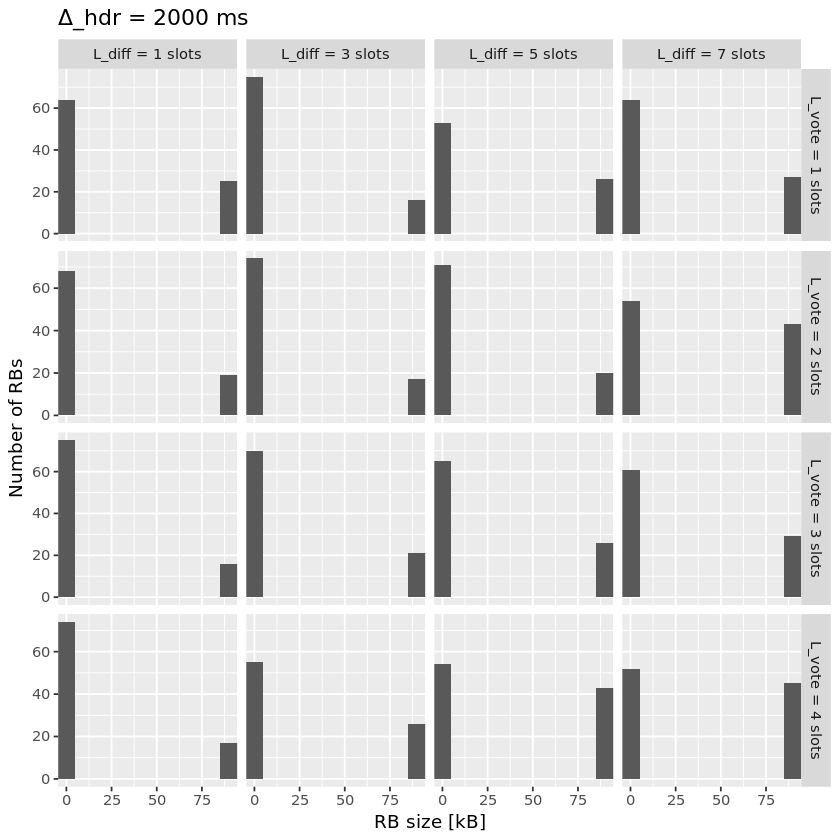

In [69]:
dtmp <-
    sizes[`Message` == "RB", .(`RB size [kB]`=`Transactions`*txSize/1e3), .(`VariedX`, `VariedY`, `VariedZ`)]
ps <- lapply(zs, function(z) {
    ggplot(dtmp[`VariedZ` == z], aes(x=`RB size [kB]`)) +
        geom_histogram(binwidth=10) +
        facet_grid(`VariedY` ~ `VariedX`, scales="free_y") +
        coord_cartesian(xlim=c(0, dtmp[, max(`RB size [kB]`)])) +
        ylab("Number of RBs") +
        ggtitle(z)
})
lapply(ps, print) %>% invisible

In [70]:
g <- ggdraw(plot_grid(plotlist=ps, ncol=1), ylim=c(0,1.04)) +
    draw_label("Size of transactions in RBs", hjust=0, vjust=1, x=0.025, y=1.03, size=16) +
    draw_label(label, hjust=0, vjust=1, x=0.025, y=1.015, size=10)
ggsave(g, file="plots/contents-rbs-size.png", units="in", dpi=150, width=11, height=17)

### Disposition of blocks

#### Data processing

In [71]:
ebSizes <- 
        sizes[`Message` == "RB" & !is.na(`Endorses`), .(`Certified`=TRUE), .(`VariedX`, `VariedY`, `VariedZ`, `Item`=`Endorses`)][
        sizes[`Message` == "EB", .(`EB Transactions`=`Transactions`), .(`VariedX`, `VariedY`, `VariedZ`, `Item`)], 
            on=c("VariedX", "VariedY", "VariedZ", "Item")
        ][
            ,
            .(
                `EB txs later not certified`=ifelse(is.na(`Certified`), as.numeric(`EB Transactions`), 0),
                `EB txs later certified`=ifelse(is.na(`Certified`), 0, as.numeric(`EB Transactions`))
            ),
            .(`VariedX`, `VariedY`, `VariedZ`, `Item`)
        ]

In [72]:
rbSizes <- 
        ebSizes[
            ebSizes[, .(`EB txs certified now`=`EB txs later certified`), .(`VariedX`, `VariedY`, `VariedZ`, `Endorses`=`Item`)][
                sizes[`Message` == "RB", .(`Generated [s]`, `RB Transactions`=as.numeric(`Transactions`)), .(`VariedX`, `VariedY`, `VariedZ`, `Item`, `Endorses`)],
                on=c("VariedX", "VariedY", "VariedZ", "Endorses")
            ],
            on=c("VariedX", "VariedY", "VariedZ", "Item")
        ][
            ,
            .(
                `Generated [s]`,
                `RB`=`RB Transactions`,
                `EB later not certified`=ifelse(is.na(`EB txs later not certified`), 0, `EB txs later not certified`),
                `EB later certified`=ifelse(is.na(`EB txs later certified`), 0, `EB txs later certified`),
                `EB now certified`=ifelse(is.na(`EB txs certified now`), 0, `EB txs certified now`)
            ),
            , .(`VariedX`, `VariedY`, `VariedZ`, `Item`)
        ]

In [73]:
blocks <- melt(
    rbSizes, 
    id.vars=c("VariedX", "VariedY", "VariedZ", "Item", "Generated [s]"),
    measure.vars=c("RB", "EB later not certified", "EB later certified", "EB now certified"),
    variable.name="Block",
    value.name="Transactions"
)

#### Sizes

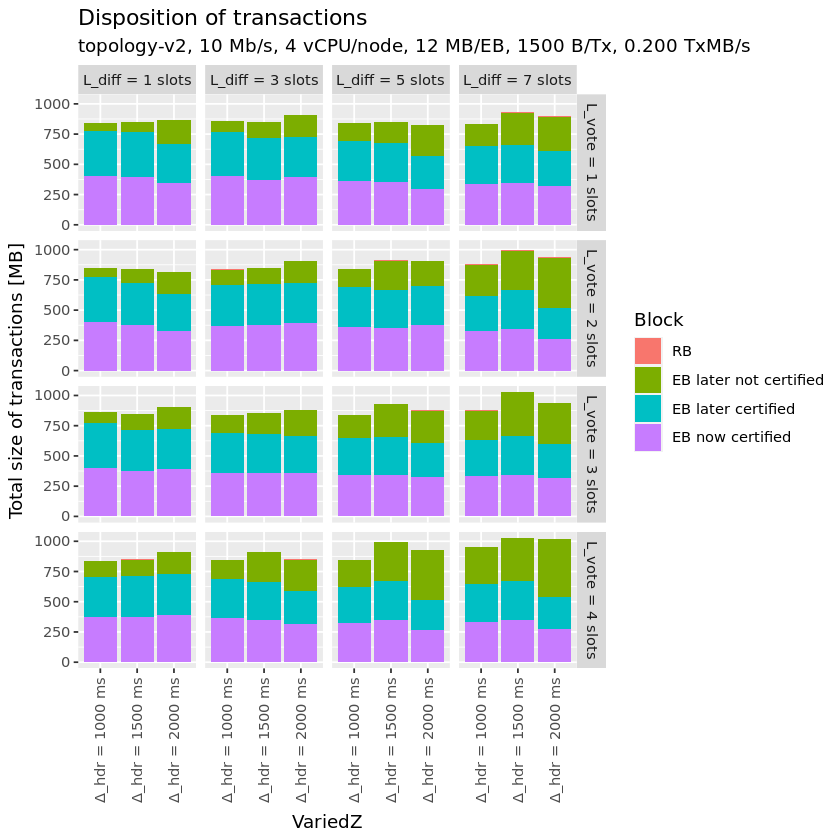

In [74]:
ggplot(
        blocks[, .(`Total size of transactions [MB]`=sum(`Transactions`)*txSize/1e6), .(`VariedX`, `VariedY`, `VariedZ`, `Block`)], 
    aes(x=`VariedZ`, y=`Total size of transactions [MB]`, fill=`Block`)
) +
    geom_bar(stat="identity") +
    facet_grid(`VariedY` ~ `VariedX`) +
    ggtitle("Disposition of transactions", label) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

In [75]:
ggsave("plots/disposition-size-histogram.png", units="in", dpi=150, width=11, height=17)

#### Release memory

In [76]:
rm(sizes, ebSizes, rbSizes, blocks, dtmp, ps, g)

In [77]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1062879,56.8,3588282,191.7,4485352,239.6
Vcells,2174797,16.6,6328209708,48280.5,12359784585,94297.7
